# Load data

In [49]:
import os
import pandas as pd
from display_utils import *

data_path = "../data/results"
bart_ft_res = pd.read_csv(os.path.join(data_path,"bart-ft-results.csv"))
llama_ft_res = pd.read_csv(os.path.join(data_path,"llama-ft-results.csv"))
llama_instr_res = pd.read_csv(os.path.join(data_path,"llama-instruct-few-shot-results.csv"))
llama_instr_prompt_res = pd.read_csv(os.path.join(data_path,"llama-instruct-few-shot-prompt-results.csv"))

# Model comparison

## BLEU-1 Score

In [3]:
bart_ft_df = preprocess_dataframe(bart_ft_res, "b1", "bart-ft")
llama_ft_df = preprocess_dataframe(llama_ft_res,"b1", "llama-ft")
llama_instr_df = preprocess_dataframe(llama_instr_res,"b1","llama-instr-few-shot")

df = merge_dataframes([bart_ft_df,llama_ft_df,llama_instr_df])
df

,dataset,bart-ft_base-b1,bart-ft_masked-b1,bart-ft_subject-b1,bart-ft_target-phrase-b1,bart-ft_target-sent-b1,bart-ft_target-sent-target-b1,bart-ft_target-sent-subject-b1,llama-ft_base-b1,llama-ft_masked-b1,...,llama-instr-few-shot_base-n3-b1,llama-instr-few-shot_masked-n3-b1,llama-instr-few-shot_target-phrase-n3-b1,llama-instr-few-shot_target-sent-n3-b1,llama-instr-few-shot_target-sent-target-n3-b1,llama-instr-few-shot_base-n6-b1,llama-instr-few-shot_masked-n6-b1,llama-instr-few-shot_target-phrase-n6-b1,llama-instr-few-shot_target-sent-n6-b1,llama-instr-few-shot_target-sent-target-n6-b1
0,c2s,20.127,18.792,30.405,19.096,19.105,20.562,31.640,22.070,22.447,...,16.599,16.395,16.313,16.201,16.878,16.284,16.886,16.389,16.218,16.267
1,c2sp,19.784,20.500,31.428,20.618,19.568,20.683,32.585,20.439,22.299,...,15.888,13.579,17.815,15.954,17.834,16.451,15.926,17.134,16.185,17.913
2,c4s,19.593,19.678,32.311,20.097,20.790,20.867,32.391,23.374,23.978,...,14.788,15.758,17.925,15.141,16.922,15.158,16.068,18.099,15.358,16.788
3,c4sp,18.544,20.353,30.628,21.256,19.733,21.943,32.564,20.691,21.377,...,14.725,12.440,17.070,14.721,16.577,14.426,14.667,17.914,14.997,17.927
4,c2spo,16.943,NaN,28.003,19.295,17.935,20.138,29.786,16.764,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,c4spo,16.532,NaN,29.767,19.756,18.626,19.709,32.098,15.761,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,c2op,18.676,NaN,NaN,24.893,20.421,24.802,NaN,16.604,NaN,...,12.324,NaN,15.777,12.336,16.111,13.407,NaN,16.320,13.021,16.082
7,c2o,19.754,NaN,NaN,24.386,20.259,24.485,NaN,17.948,NaN,...,12.200,NaN,15.684,12.663,16.320,12.301,NaN,16.135,12.484,16.491


In [6]:
find_max_value(df, exclude_substrings=["subject"],exclude_datasets=["c2op","c2o"])

Highest score: 24.327
Dataset: c4s
Column: llama-ft_target-phrase-b1


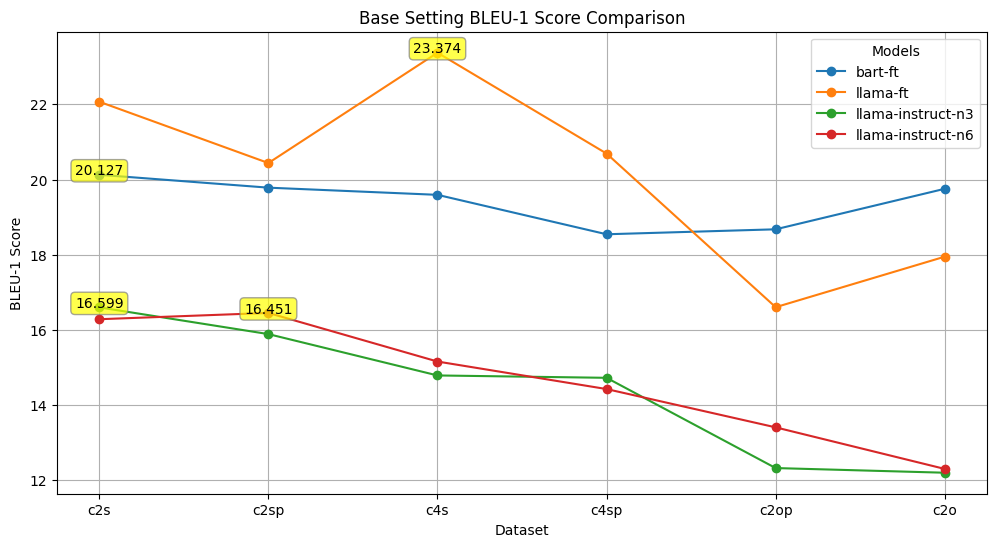

In [11]:
compare_setting(
    dataframe=df,
    score_type="BLEU-1",
    setting="base",
    title="Base Setting BLEU-1 Score Comparison",
    exclude_datasets=["c2spo","c4spo"],
    exclude_columns=["llama-instr-few-shot_base-b1"]
)

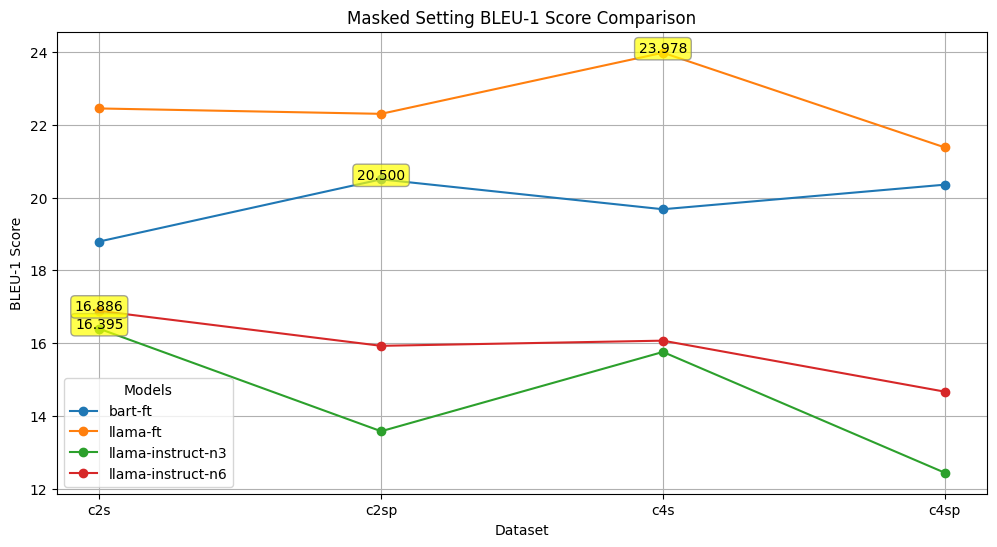

In [5]:
compare_setting(
    dataframe=df,
    score_type="BLEU-1",
    dataset_column='dataset',
    setting='masked',
    title="Masked Setting BLEU-1 Score Comparison",
    exclude_columns=["llama-instr-few-shot_masked-b1"]
)

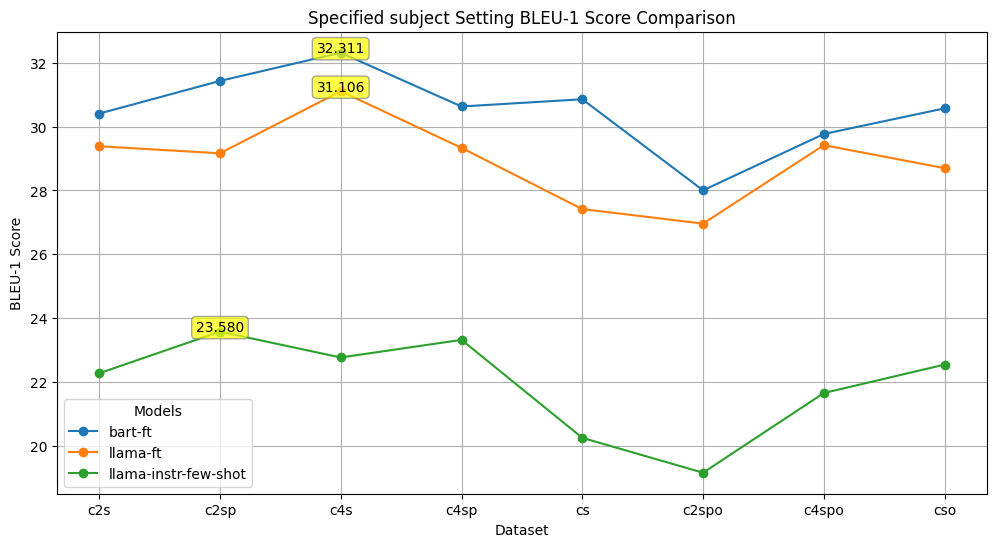

In [6]:
compare_setting(
    dataframe=df,
    score_type="BLEU-1",
    dataset_column='dataset',
    column_type='subject-b1',
    title="Specified subject Setting BLEU-1 Score Comparison"
)

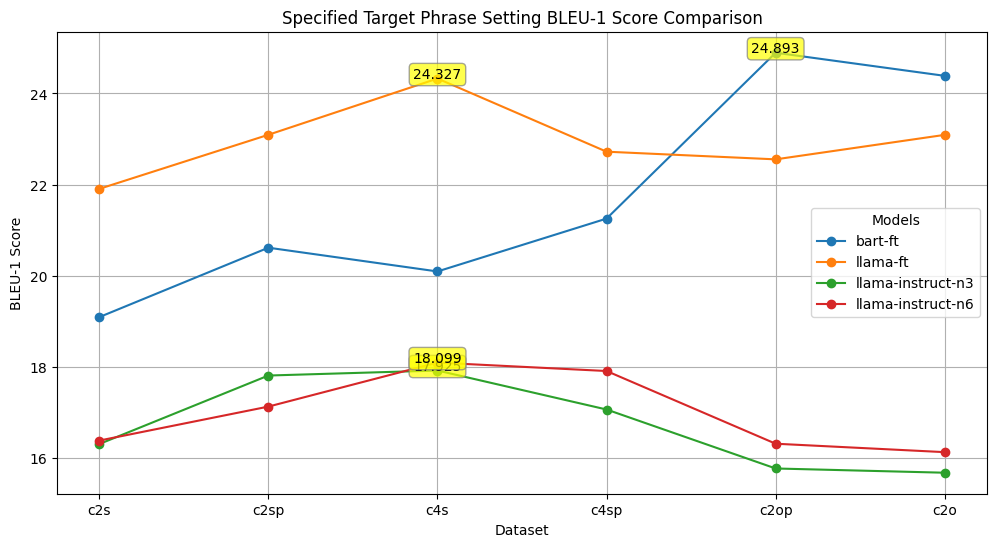

In [4]:
compare_setting(
    dataframe=df,
    score_type="BLEU-1",
    dataset_column='dataset',
    setting="target-phrase",
    title="Specified Target Phrase Setting BLEU-1 Score Comparison",
    exclude_datasets=["c2spo","c4spo"],
    exclude_columns=["llama-instr-few-shot_target-phrase-b1"]
)

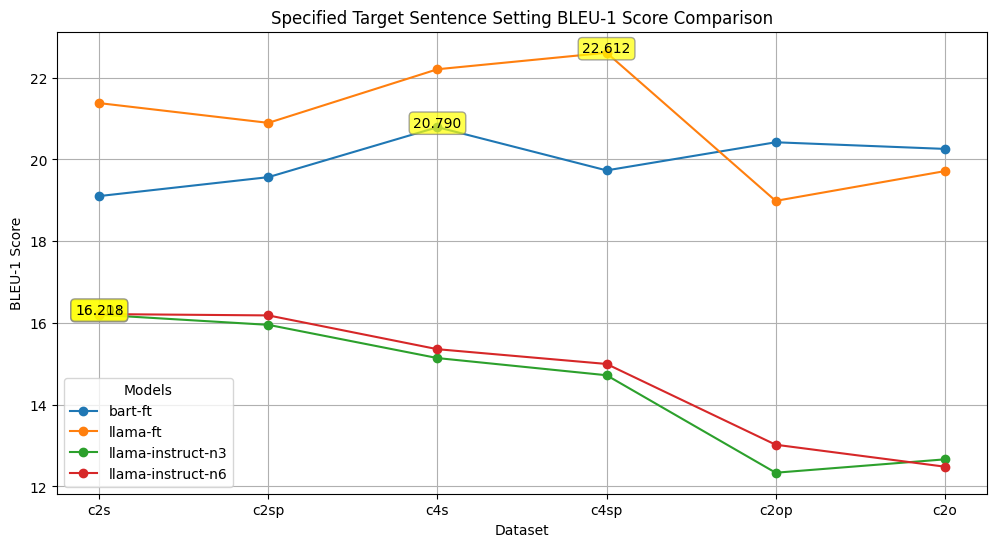

In [4]:
compare_setting(
    dataframe=df,
    score_type="BLEU-1",
    dataset_column='dataset',
    setting='target-sent',
    title="Specified Target Sentence Setting BLEU-1 Score Comparison",
    exclude_datasets=["c2spo","c4spo"],
    exclude_columns=["llama-instr-few-shot_target-sent-b1"]
)

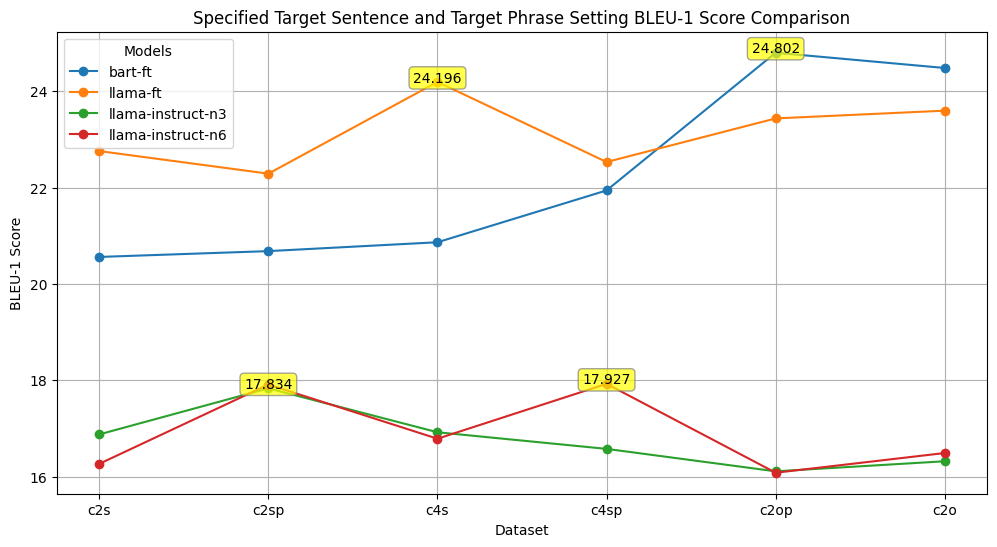

In [10]:
compare_setting(
    dataframe=df,
    score_type="BLEU-1",
    dataset_column='dataset',
    setting='target-sent-target',
    title="Specified Target Sentence and Target Phrase Setting BLEU-1 Score Comparison",
    exclude_datasets=["c2spo","c4spo"],
    exclude_columns=["llama-instr-few-shot_target-sent-target-b1"]
)

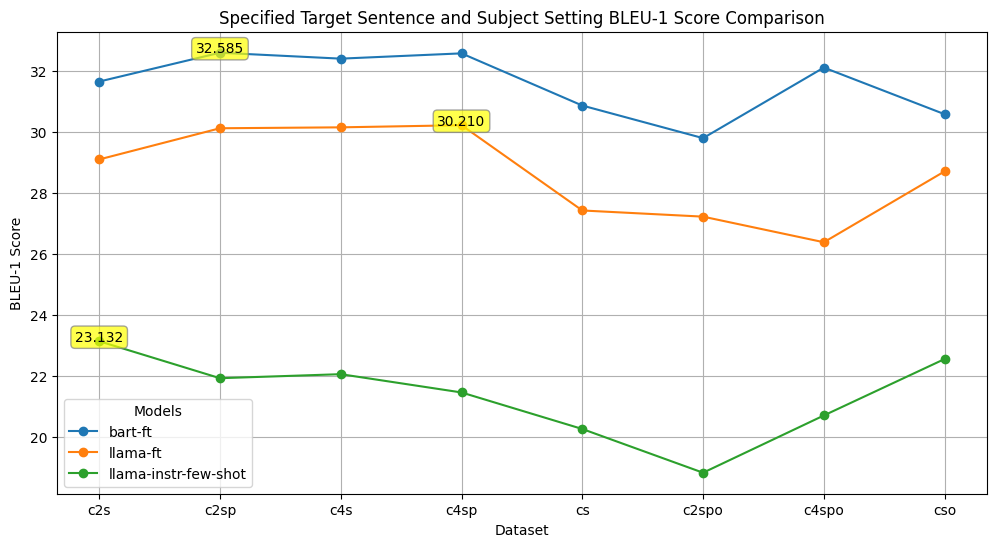

In [14]:
compare_setting(
    dataframe=df,
    score_type="BLEU-1",
    dataset_column='dataset',
    column_type='target-sent-subject-b1',
    title="Specified Target Sentence and Subject Setting BLEU-1 Score Comparison"
)

## BLEU-2 Score

In [7]:
bart_ft_df = preprocess_dataframe(bart_ft_res, "b2", "bart-ft")
llama_ft_df = preprocess_dataframe(llama_ft_res,"b2", "llama-ft")
llama_instr_df = preprocess_dataframe(llama_instr_res,"b2","llama-instr-few-shot")

df = merge_dataframes([bart_ft_df,llama_ft_df,llama_instr_df])
df.head()

,dataset,bart-ft_base-b2,bart-ft_masked-b2,bart-ft_subject-b2,bart-ft_target-phrase-b2,bart-ft_target-sent-b2,bart-ft_target-sent-target-b2,bart-ft_target-sent-subject-b2,llama-ft_base-b2,llama-ft_masked-b2,...,llama-instr-few-shot_base-n3-b2,llama-instr-few-shot_masked-n3-b2,llama-instr-few-shot_target-phrase-n3-b2,llama-instr-few-shot_target-sent-n3-b2,llama-instr-few-shot_target-sent-target-n3-b2,llama-instr-few-shot_base-n6-b2,llama-instr-few-shot_masked-n6-b2,llama-instr-few-shot_target-phrase-n6-b2,llama-instr-few-shot_target-sent-n6-b2,llama-instr-few-shot_target-sent-target-n6-b2
0,c2s,6.451,4.865,19.002,5.077,6.143,7.324,20.938,9.862,9.638,...,5.412,4.933,4.719,4.707,5.182,5.439,4.509,5.098,4.333,5.528
1,c2sp,6.257,8.371,20.317,7.455,5.629,7.216,21.927,8.020,9.604,...,5.029,3.544,5.302,4.600,5.755,5.631,4.211,4.790,5.044,5.044
2,c4s,6.638,6.381,20.601,7.241,7.610,7.871,21.728,9.504,9.615,...,3.992,4.099,6.373,3.934,5.181,3.637,4.740,6.318,3.992,4.789
3,c4sp,6.585,7.890,19.846,8.951,6.390,9.317,21.634,8.296,8.435,...,3.387,3.373,5.196,3.889,4.007,3.505,3.852,5.662,4.611,5.508
4,c2spo,3.266,NaN,17.341,6.959,3.810,7.722,18.353,5.063,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
find_max_value(df,exclude_substrings=["subject"],exclude_datasets=["c2op","c2o"])

Highest score: 10.968
Dataset: c4s
Column: llama-ft_target-phrase-b2


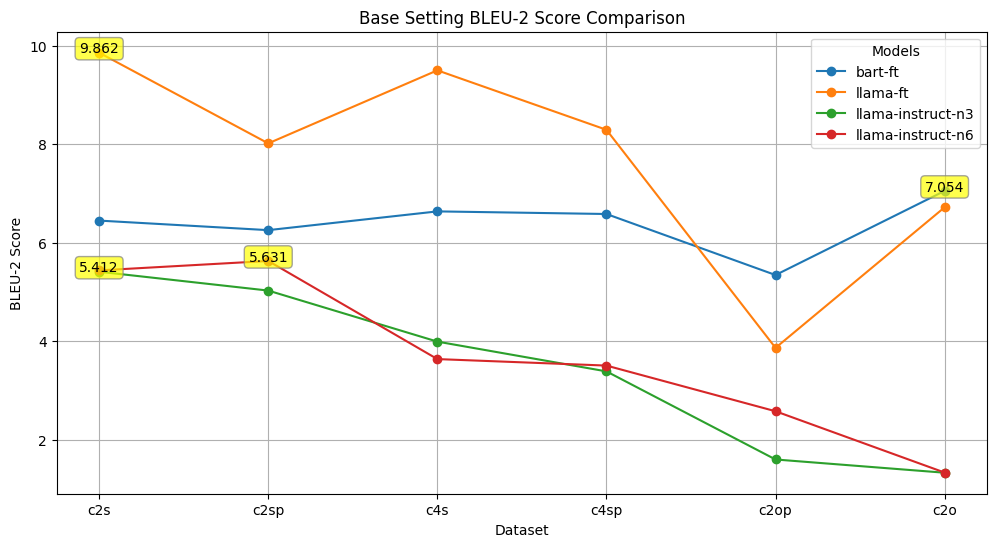

In [10]:
compare_setting(
    dataframe=df,
    score_type="BLEU-2",
    dataset_column='dataset',
    setting='base',
    title="Base Setting BLEU-2 Score Comparison",
    exclude_datasets=["c2spo","c4spo"],
    exclude_columns=["llama-instr-few-shot_base-b2"]
)

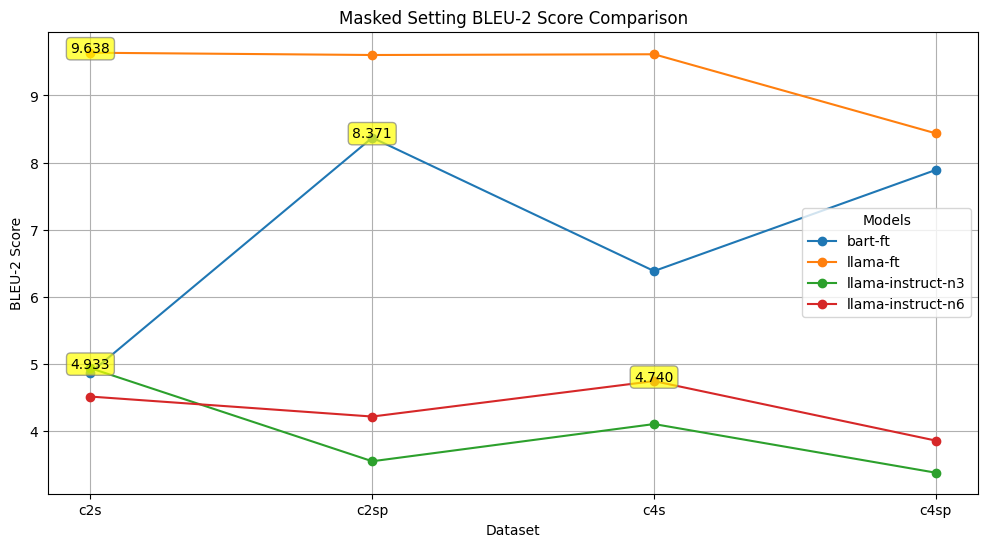

In [12]:
compare_setting(
    dataframe=df,
    score_type="BLEU-2",
    dataset_column='dataset',
    setting='masked',
    title="Masked Setting BLEU-2 Score Comparison",
    exclude_columns=["llama-instr-few-shot_masked-b2"]
)

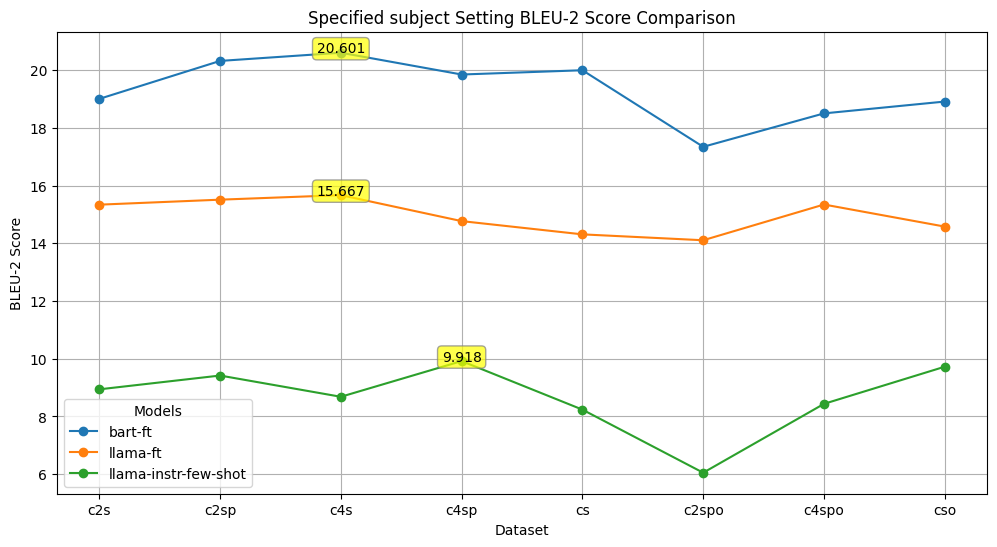

In [14]:
compare_setting(
    dataframe=df,
    score_type="BLEU-2",
    dataset_column='dataset',
    column_type='subject-b2',
    title="Specified subject Setting BLEU-2 Score Comparison"
)

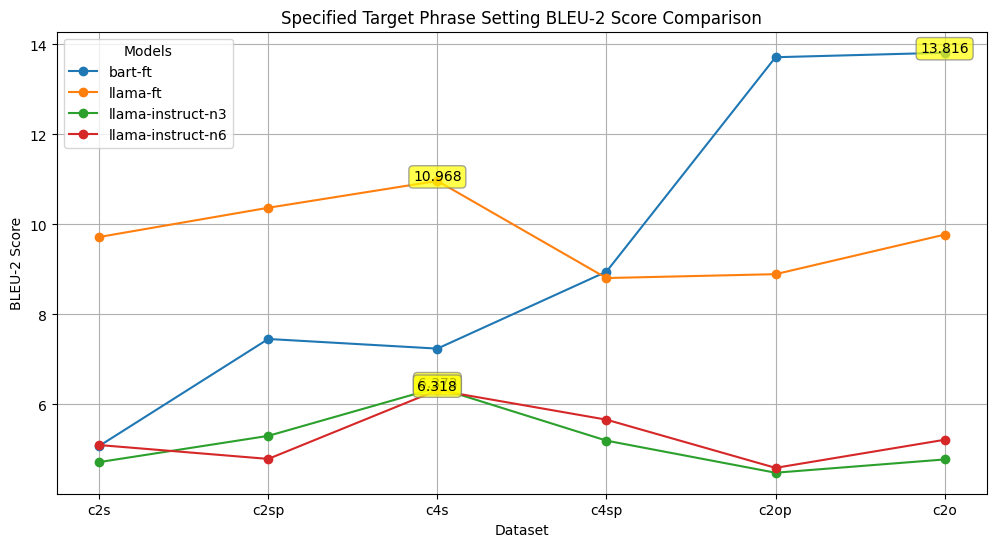

In [14]:
compare_setting(
    dataframe=df,
    score_type="BLEU-2",
    dataset_column='dataset',
    setting='target-phrase',
    title="Specified Target Phrase Setting BLEU-2 Score Comparison",
    exclude_datasets=["c2spo","c4spo"],
    exclude_columns=["llama-instr-few-shot_target-phrase-b2"]
)

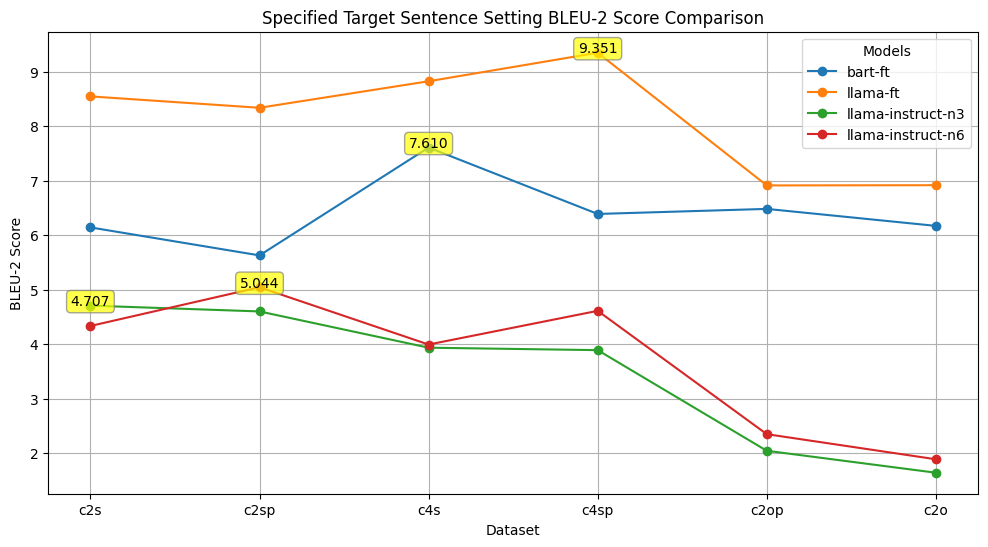

In [16]:
compare_setting(
    dataframe=df,
    score_type="BLEU-2",
    dataset_column='dataset',
    setting='target-sent',
    title="Specified Target Sentence Setting BLEU-2 Score Comparison",
    exclude_datasets=["c2spo","c4spo"],
    exclude_columns=["llama-instr-few-shot_target-sent-b2"]
)

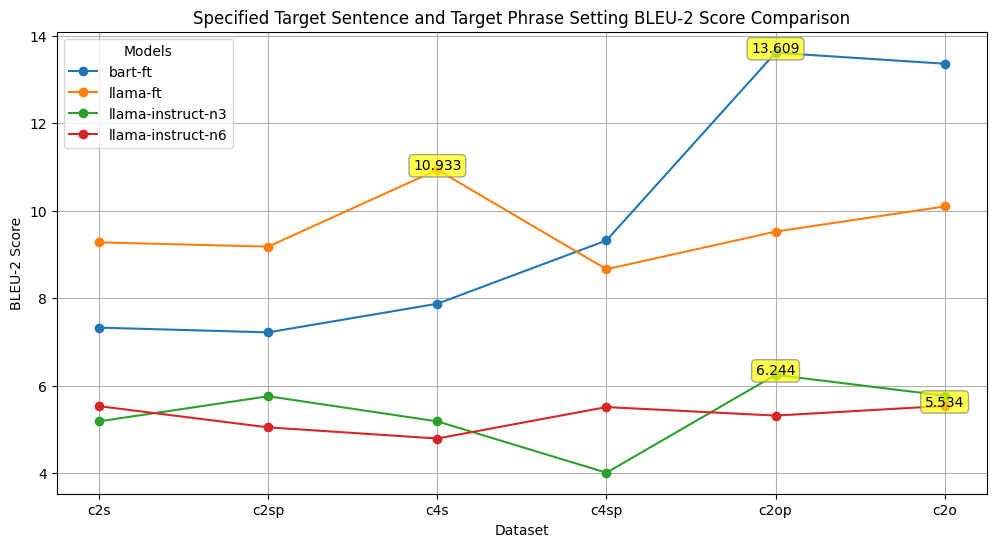

In [18]:
compare_setting(
    dataframe=df,
    score_type="BLEU-2",
    dataset_column='dataset',
    setting='target-sent-target',
    title="Specified Target Sentence and Target Phrase Setting BLEU-2 Score Comparison",
    exclude_datasets=["c2spo","c4spo"],
    exclude_columns=["llama-instr-few-shot_target-sent-target-b2"]
)

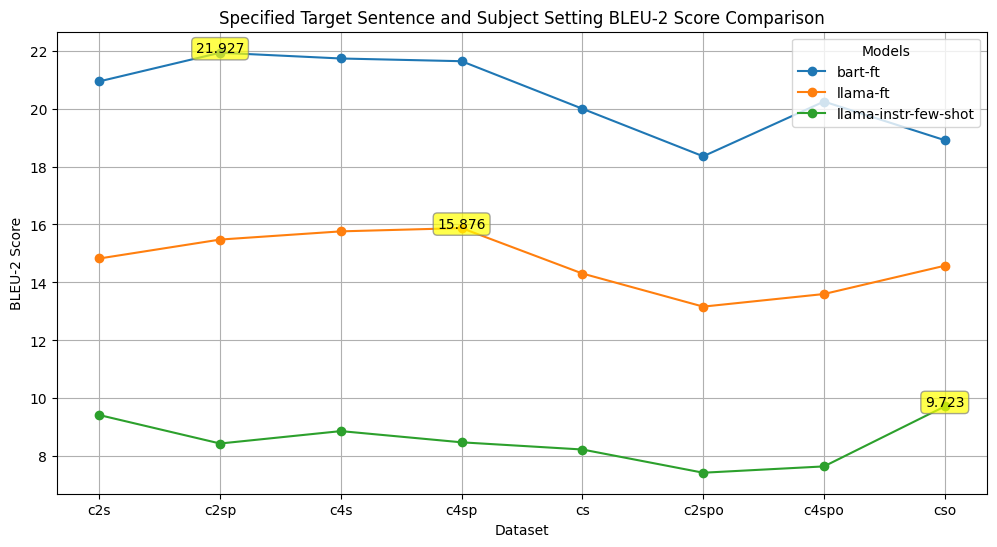

In [23]:
compare_setting(
    dataframe=df,
    score_type="BLEU-2",
    dataset_column='dataset',
    column_type='target-sent-subject-b2',
    title="Specified Target Sentence and Subject Setting BLEU-2 Score Comparison"
)

## BERTScore

In [2]:
bart_ft_df = preprocess_dataframe(bart_ft_res, "bsf1", "bart-ft")
llama_ft_df = preprocess_dataframe(llama_ft_res,"bsf1", "llama-ft")
llama_instr_df = preprocess_dataframe(llama_instr_res,"bsf1","llama-instr-few-shot")

df = merge_dataframes([bart_ft_df,llama_ft_df,llama_instr_df])
df.head()

,dataset,bart-ft_base-bsf1,bart-ft_masked-bsf1,bart-ft_subject-bsf1,bart-ft_target-phrase-bsf1,bart-ft_target-sent-bsf1,bart-ft_target-sent-target-bsf1,bart-ft_target-sent-subject-bsf1,llama-ft_base-bsf1,llama-ft_masked-bsf1,...,llama-instr-few-shot_base-n3-bsf1,llama-instr-few-shot_masked-n3-bsf1,llama-instr-few-shot_target-phrase-n3-bsf1,llama-instr-few-shot_target-sent-n3-bsf1,llama-instr-few-shot_target-sent-target-n3-bsf1,llama-instr-few-shot_base-n6-bsf1,llama-instr-few-shot_masked-n6-bsf1,llama-instr-few-shot_target-phrase-n6-bsf1,llama-instr-few-shot_target-sent-n6-bsf1,llama-instr-few-shot_target-sent-target-n6-bsf1
0,c2s,0.468,0.461,0.559,0.482,0.470,0.494,0.574,0.501,0.503,...,0.453,0.450,0.469,0.455,0.475,0.450,0.447,0.471,0.454,0.474
1,c2sp,0.487,0.489,0.566,0.497,0.480,0.492,0.574,0.482,0.507,...,0.450,0.445,0.480,0.455,0.481,0.445,0.447,0.473,0.451,0.480
2,c4s,0.470,0.471,0.573,0.486,0.490,0.492,0.572,0.499,0.500,...,0.441,0.448,0.479,0.452,0.478,0.440,0.449,0.477,0.451,0.471
3,c4sp,0.470,0.491,0.566,0.514,0.492,0.517,0.568,0.479,0.493,...,0.436,0.438,0.482,0.444,0.473,0.432,0.442,0.482,0.436,0.476
4,c2spo,0.440,NaN,0.559,0.487,0.445,0.492,0.571,0.446,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
find_max_value(df,exclude_substrings=["subject"],exclude_datasets=["c2op","c2o"])

Highest score: 0.519
Dataset: c4s
Column: llama-ft_target-phrase-bsf1


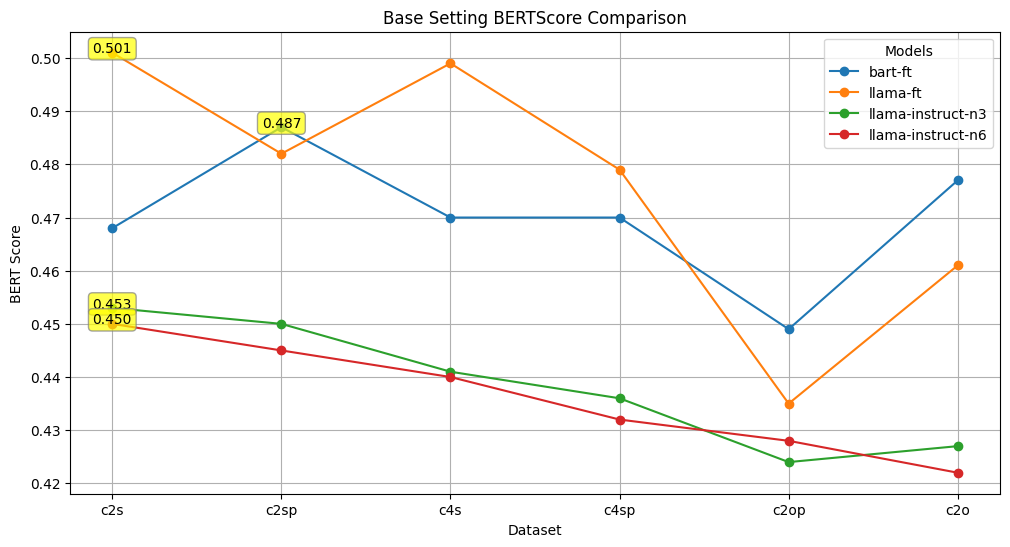

In [3]:
compare_setting(
    dataframe=df,
    score_type="BERT",
    dataset_column='dataset',
    setting='base',
    title="Base Setting BERTScore Comparison",
    exclude_datasets=["c2spo","c4spo"],
    exclude_columns=["llama-instr-few-shot_base-bsf1"]
)

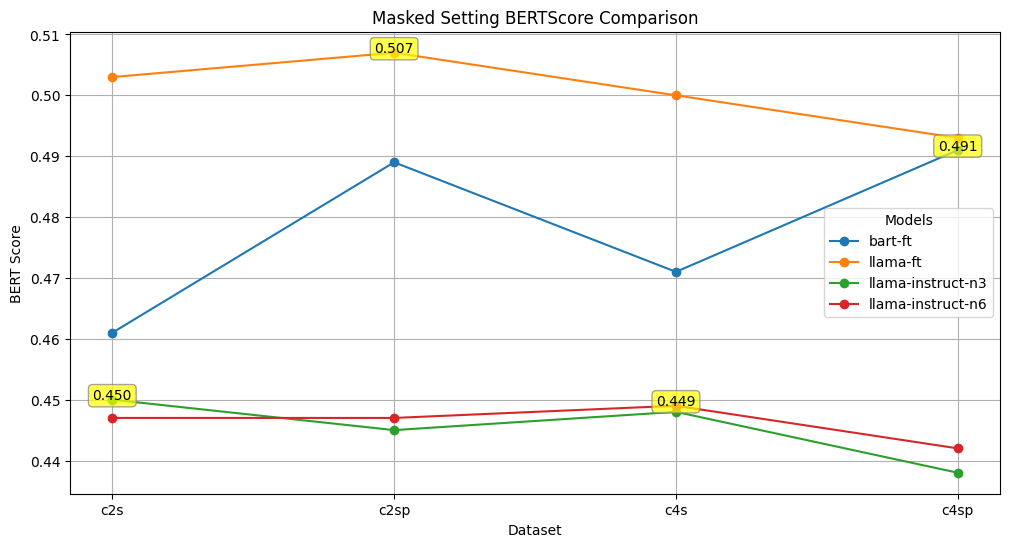

In [5]:
compare_setting(
    dataframe=df,
    score_type="BERT",
    dataset_column='dataset',
    setting='masked',
    title="Masked Setting BERTScore Comparison",
    exclude_columns=["llama-instr-few-shot_masked-bsf1"]
)

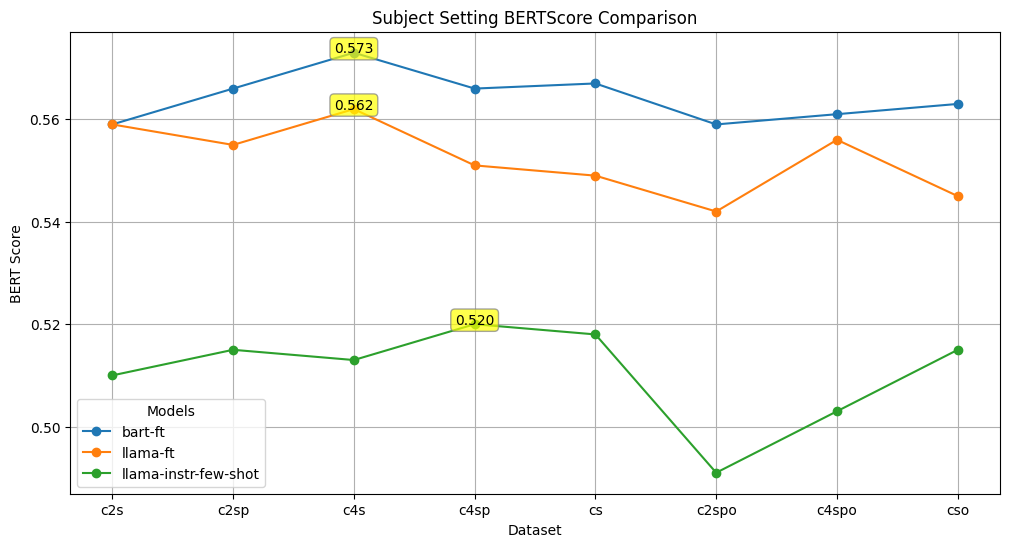

In [37]:
compare_setting(
    dataframe=df,
    score_type="BERT",
    dataset_column='dataset',
    column_type='subject-bsf1',
    title="Subject Setting BERTScore Comparison"
)

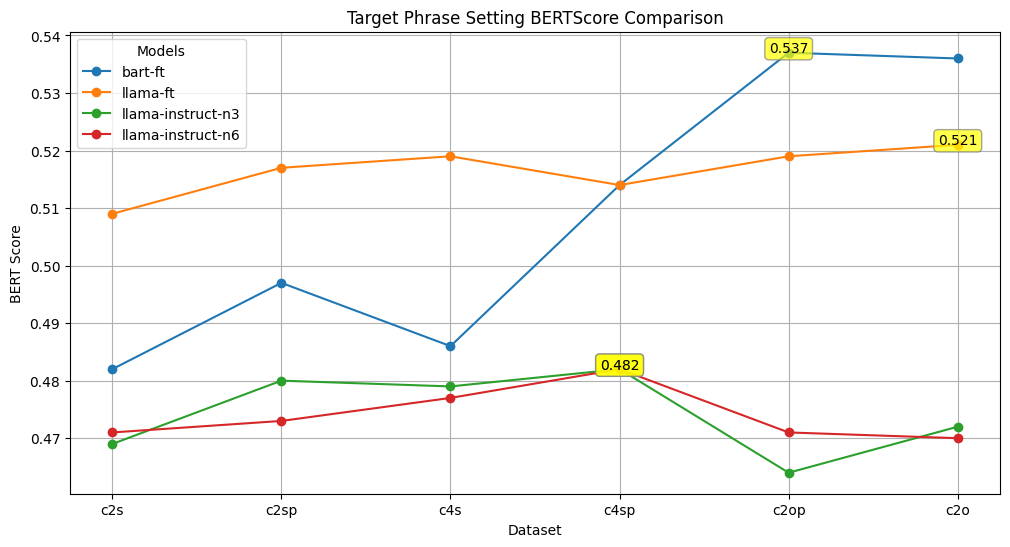

In [3]:
compare_setting(
    dataframe=df,
    score_type="BERT",
    dataset_column='dataset',
    setting='target-phrase',
    title="Target Phrase Setting BERTScore Comparison",
    exclude_datasets=["c2spo","c4spo"],
    exclude_columns=["llama-instr-few-shot_target-phrase-bsf1"]
)

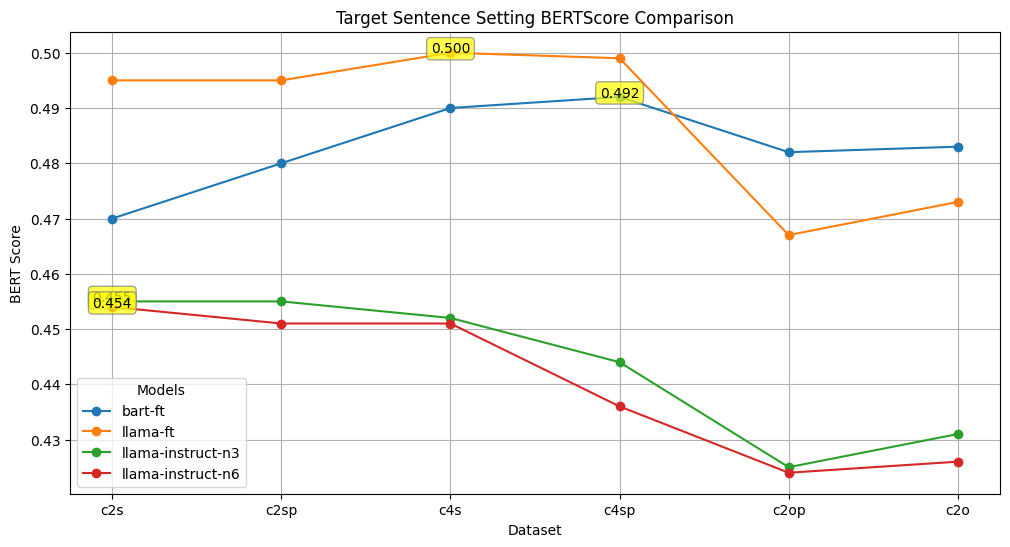

In [5]:
compare_setting(
    dataframe=df,
    score_type="BERT",
    dataset_column='dataset',
    setting='target-sent',
    title="Target Sentence Setting BERTScore Comparison",
    exclude_datasets=["c2spo","c4spo"],
    exclude_columns=["llama-instr-few-shot_target-sent-bsf1"]
)

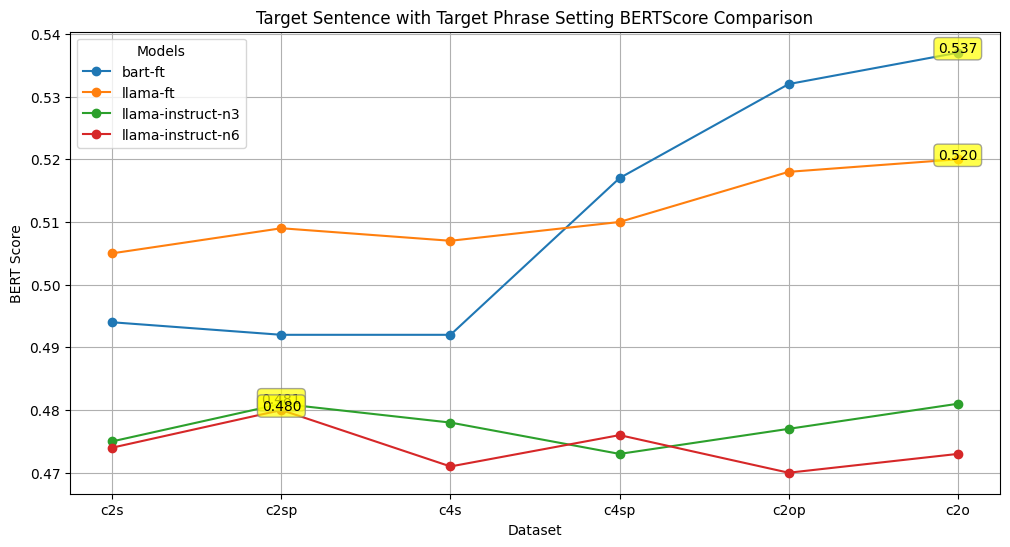

In [7]:
compare_setting(
    dataframe=df,
    score_type="BERT",
    dataset_column='dataset',
    setting='target-sent-target',
    title="Target Sentence with Target Phrase Setting BERTScore Comparison",
    exclude_datasets=["c2spo","c4spo"],
    exclude_columns=["llama-instr-few-shot_target-sent-target-bsf1"]
)

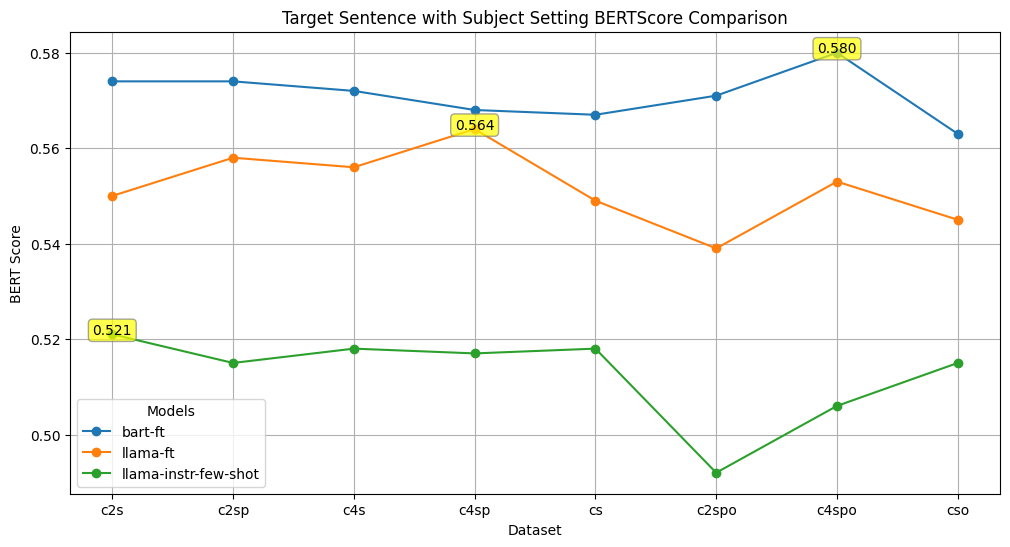

In [41]:
compare_setting(
    dataframe=df,
    score_type="BERT",
    dataset_column='dataset',
    column_type='target-sent-subject-bsf1',
    title="Target Sentence with Subject Setting BERTScore Comparison"
)

## BARTScore
https://huggingface.co/posts/santiviquez/809039256258115

In [2]:
bart_ft_df = preprocess_dataframe(bart_ft_res, "bartscore", "bart-ft")
llama_ft_df = preprocess_dataframe(llama_ft_res,"bartscore", "llama-ft")
llama_instr_df = preprocess_dataframe(llama_instr_res,"bartscore","llama-instr-few-shot")

df = merge_dataframes([bart_ft_df,llama_ft_df,llama_instr_df])
df.head()

,dataset,bart-ft_base-bartscore,bart-ft_masked-bartscore,bart-ft_subject-bartscore,bart-ft_target-phrase-bartscore,bart-ft_target-sent-bartscore,bart-ft_target-sent-target-bartscore,bart-ft_target-sent-subject-bartscore,llama-ft_base-bartscore,llama-ft_masked-bartscore,...,llama-instr-few-shot_base-n3-bartscore,llama-instr-few-shot_masked-n3-bartscore,llama-instr-few-shot_target-phrase-n3-bartscore,llama-instr-few-shot_target-sent-n3-bartscore,llama-instr-few-shot_target-sent-target-n3-bartscore,llama-instr-few-shot_base-n6-bartscore,llama-instr-few-shot_masked-n6-bartscore,llama-instr-few-shot_target-phrase-n6-bartscore,llama-instr-few-shot_target-sent-n6-bartscore,llama-instr-few-shot_target-sent-target-n6-bartscore
0,c2s,-3.438,-3.465,-2.954,-3.328,-3.356,-3.279,-2.912,-3.328,-3.340,...,-3.875,-3.820,-3.673,-3.822,-3.686,-3.868,-3.813,-3.735,-3.806,-3.688
1,c2sp,-3.406,-3.396,-2.930,-3.317,-3.403,-3.339,-2.876,-3.393,-3.273,...,-3.904,-3.922,-3.611,-3.858,-3.650,-3.917,-3.841,-3.656,-3.839,-3.701
2,c4s,-3.395,-3.396,-2.906,-3.305,-3.322,-3.320,-2.898,-3.344,-3.341,...,-3.927,-3.863,-3.688,-3.833,-3.717,-3.918,-3.844,-3.721,-3.876,-3.751
3,c4sp,-3.386,-3.363,-2.952,-3.261,-3.347,-3.279,-2.892,-3.358,-3.328,...,-4.013,-4.031,-3.632,-3.850,-3.658,-3.968,-3.921,-3.645,-3.957,-3.702
4,c2spo,-3.531,NaN,-3.002,-3.421,-3.590,-3.383,-2.995,-3.517,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
find_max_value(df,exclude_substrings=["subject"])

Highest score: -3.162
Dataset: c2sp
Column: llama-ft_target-phrase-bartscore


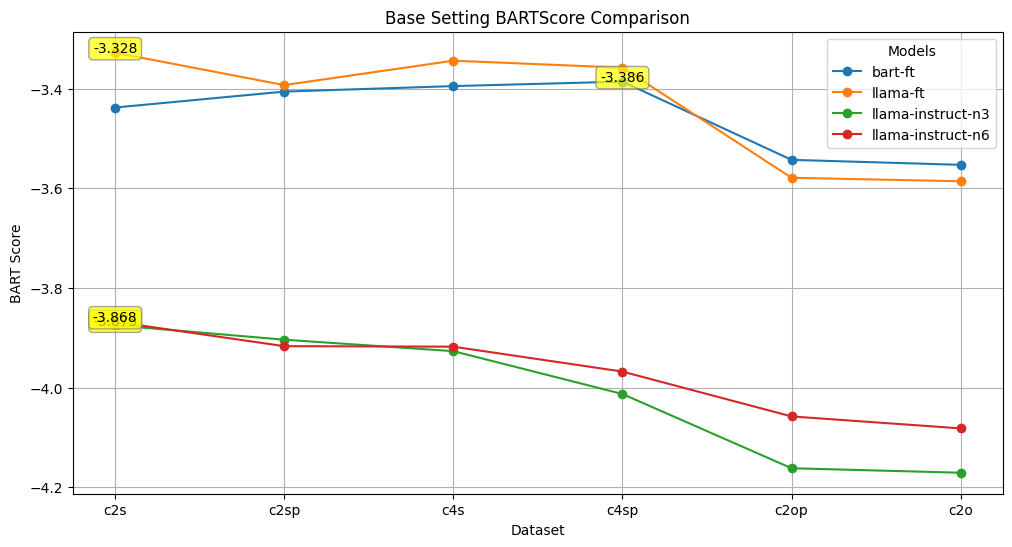

In [5]:
compare_setting(
    dataframe=df,
    score_type="BART",
    dataset_column='dataset',
    setting='base',
    title="Base Setting BARTScore Comparison",
    exclude_datasets=["c2spo","c4spo"],
    exclude_columns=["llama-instr-few-shot_base-bartscore"]
)

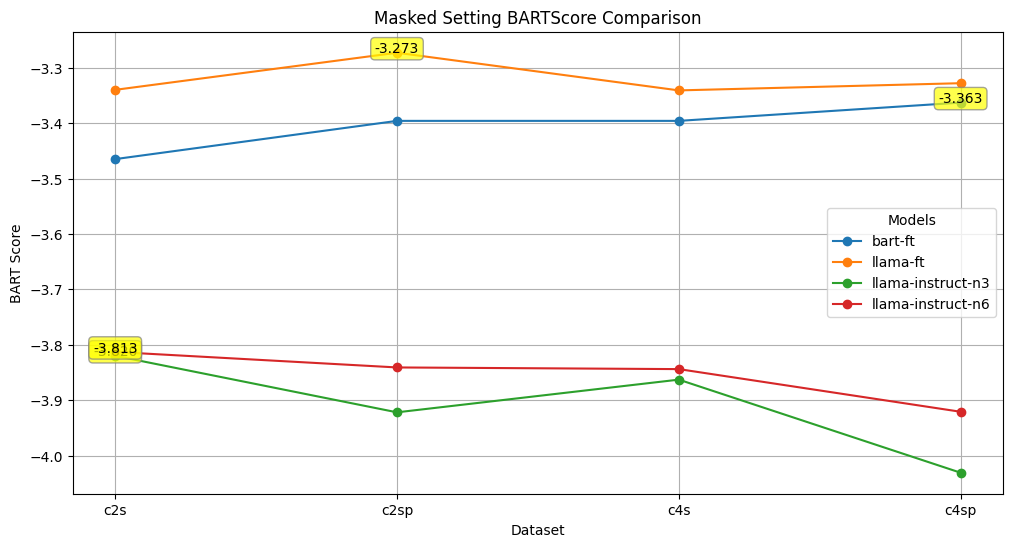

In [6]:
compare_setting(
    dataframe=df,
    score_type="BART",
    dataset_column='dataset',
    setting='masked',
    title="Masked Setting BARTScore Comparison",
    exclude_columns=["llama-instr-few-shot_masked-bartscore"]
)

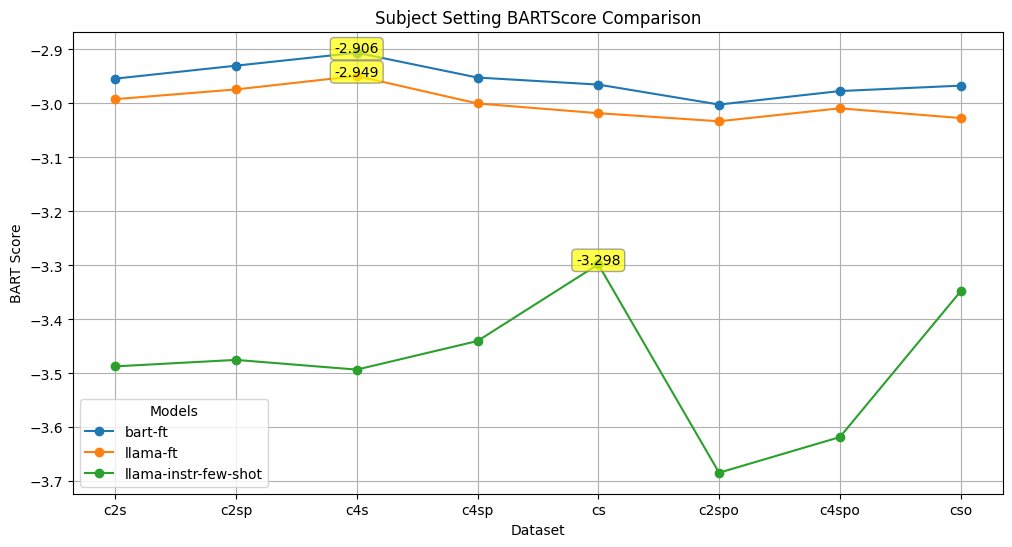

In [17]:
compare_setting(
    dataframe=df,
    score_type="BART",
    dataset_column='dataset',
    column_type='subject-bartscore',
    title="Subject Setting BARTScore Comparison"
)

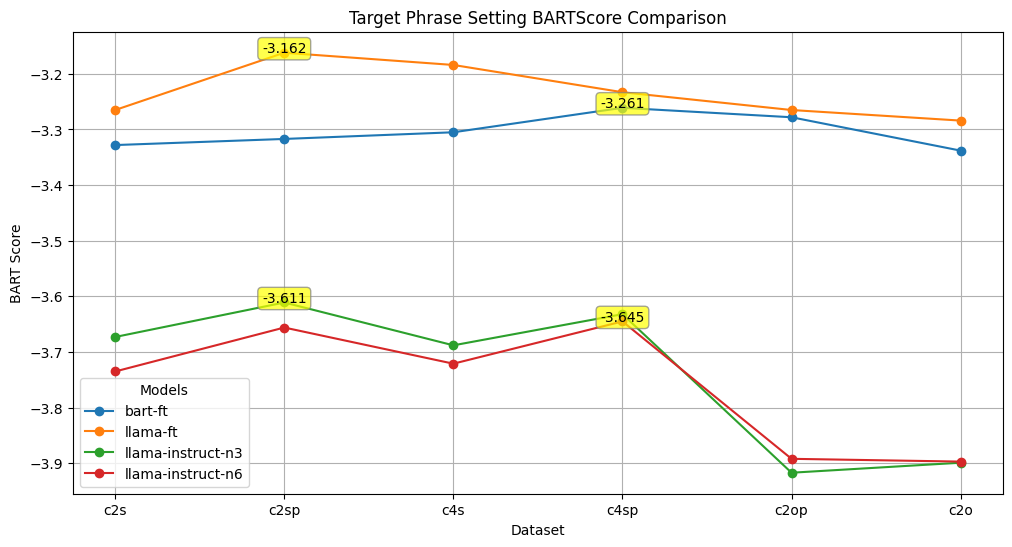

In [8]:
compare_setting(
    dataframe=df,
    score_type="BART",
    dataset_column='dataset',
    setting='target-phrase',
    title="Target Phrase Setting BARTScore Comparison",
    exclude_datasets=["c2spo","c4spo"],
    exclude_columns=["llama-instr-few-shot_target-phrase-bartscore"]
)

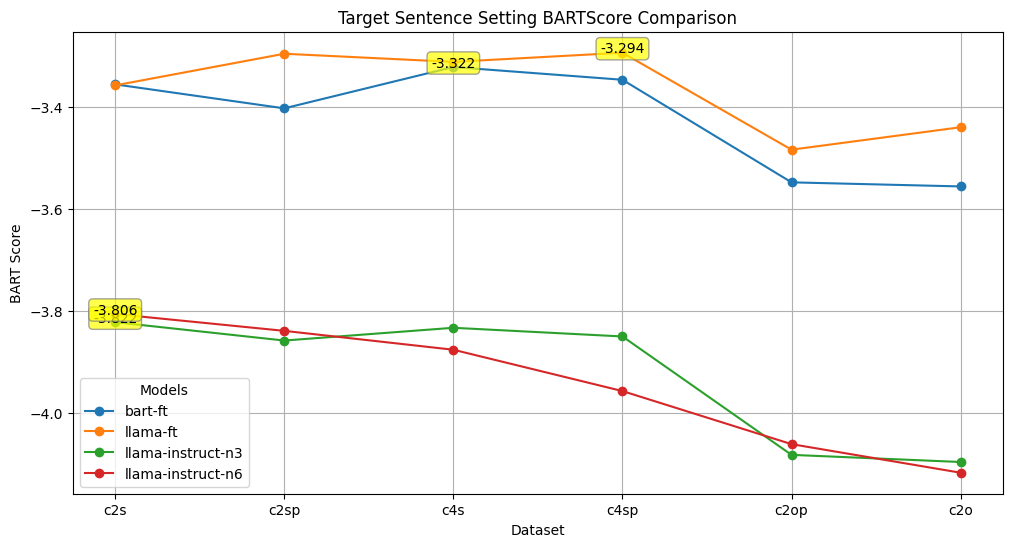

In [9]:
compare_setting(
    dataframe=df,
    score_type="BART",
    dataset_column='dataset',
    setting='target-sent',
    title="Target Sentence Setting BARTScore Comparison",
    exclude_datasets=["c2spo","c4spo"],
    exclude_columns=["llama-instr-few-shot_target-sent-bartscore"]
)

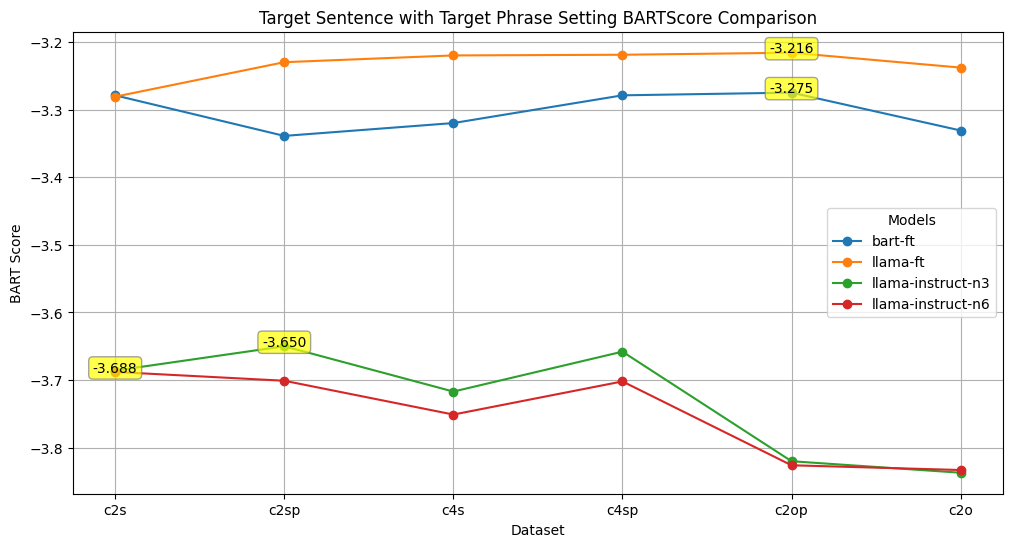

In [11]:
compare_setting(
    dataframe=df,
    score_type="BART",
    dataset_column='dataset',
    setting='target-sent-target',
    title="Target Sentence with Target Phrase Setting BARTScore Comparison",
    exclude_datasets=["c2spo","c4spo"],
    exclude_columns=["llama-instr-few-shot_target-sent-target-bartscore"]
)

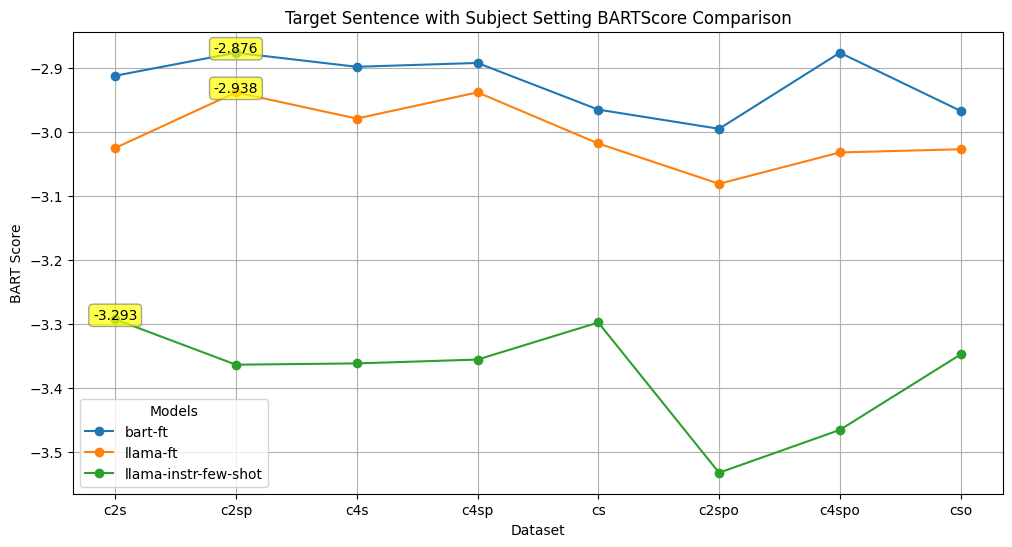

In [49]:
compare_setting(
    dataframe=df,
    score_type="BART",
    dataset_column='dataset',
    column_type='target-sent-subject-bartscore',
    title="Target Sentence with Subject Setting BARTScore Comparison"
)

# Prompt evaluation

In [2]:
df = llama_instr_prompt_res

## BLEU-1

In [11]:
df_filtered = preprocess_dataframe(llama_instr_prompt_res , "b1", "llama-instr", exclude_substrings=["random","long-valid"])
find_max_value(df_filtered)

Highest score: 16.599
Dataset: c2s
Column: llama-instr_short-n3-b1


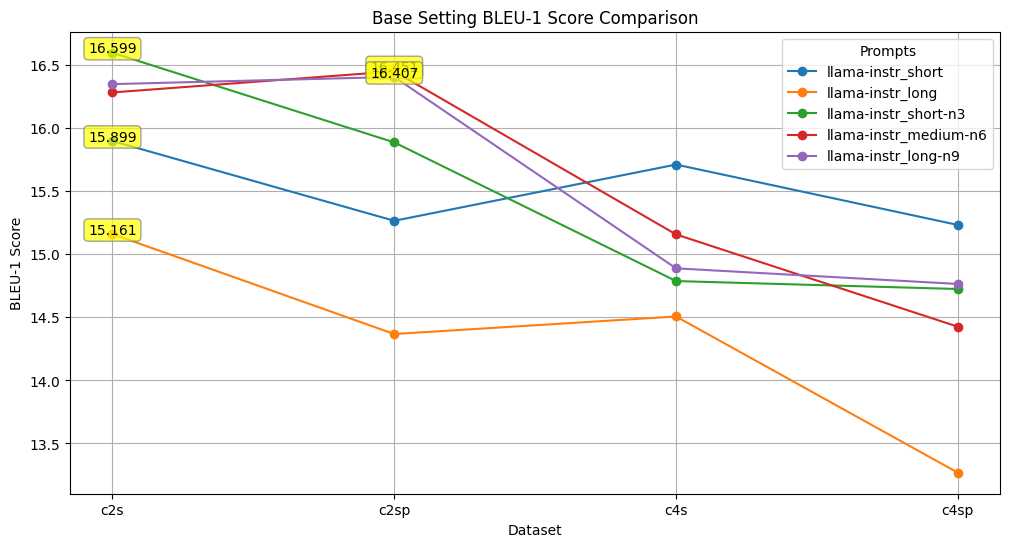

In [12]:
compare_prompt_setting(
    dataframe=df_filtered,
    score_type="BLEU-1",
    dataset_column='dataset',
    column_type='b1',
    title="Base Setting BLEU-1 Score Comparison"
)

## BLEU-2

In [13]:
df_filtered = preprocess_dataframe(llama_instr_prompt_res , "b2", "llama-instr", exclude_substrings=["random","long-valid"])
find_max_value(df_filtered)

Highest score: 5.631
Dataset: c2sp
Column: llama-instr_medium-n6-b2


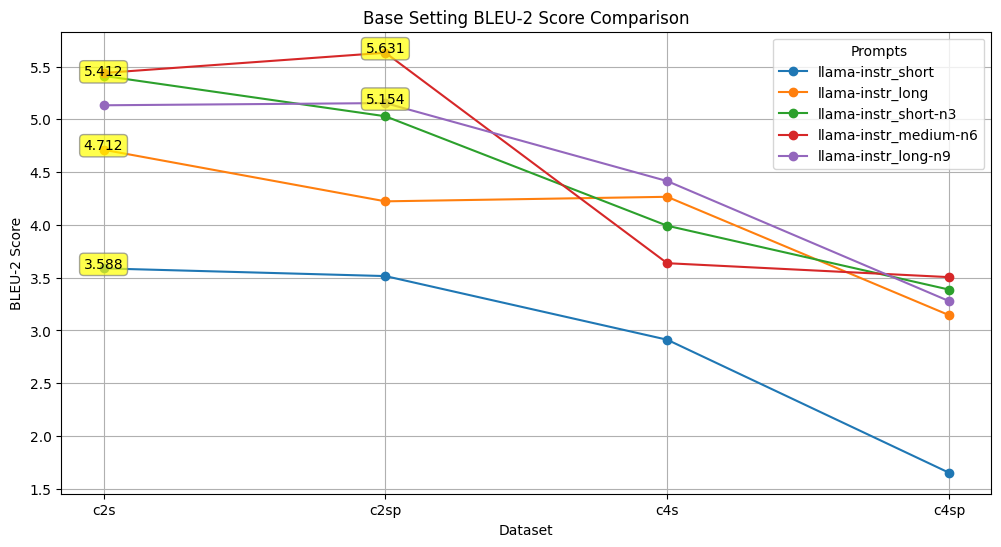

In [15]:
compare_prompt_setting(
    dataframe=df_filtered,
    score_type="BLEU-2",
    dataset_column='dataset',
    column_type='b2',
    title="Base Setting BLEU-2 Score Comparison"
)

## BERTScore

In [16]:
df_filtered = preprocess_dataframe(llama_instr_prompt_res , "bsf1", "llama-instr", exclude_substrings=["random","long-valid"])
find_max_value(df_filtered)

Highest score: 0.475
Dataset: c2s
Column: llama-instr_short-bsf1


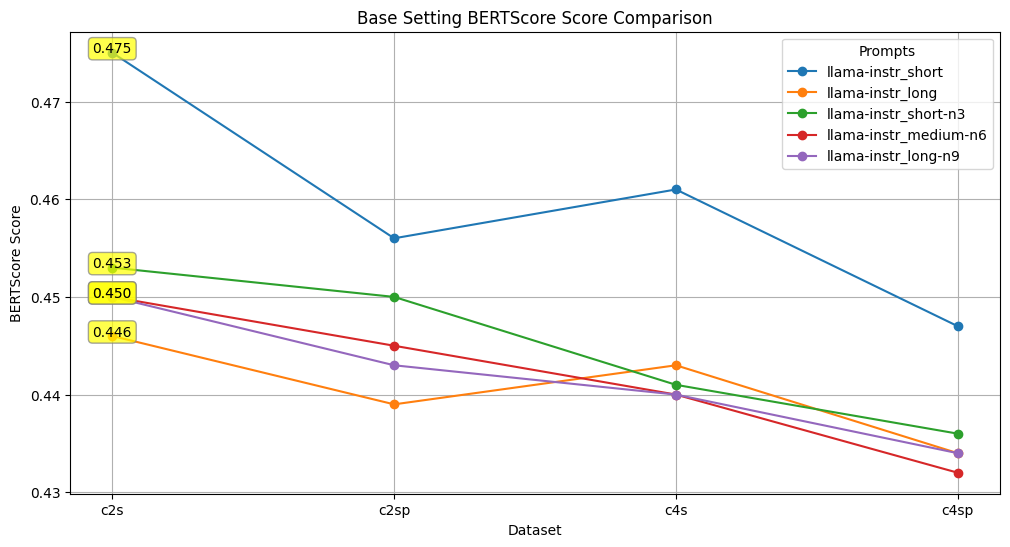

In [17]:
compare_prompt_setting(
    dataframe=df_filtered,
    score_type="BERTScore",
    dataset_column='dataset',
    column_type='bsf1',
    title="Base Setting BERTScore Score Comparison"
)

## BARTScore

In [24]:
df_filtered = preprocess_dataframe(llama_instr_prompt_res , "bartscore", "llama-instr", exclude_substrings=["random","long-valid"])
find_max_value(df_filtered)

Highest score: -3.778
Dataset: c2s
Column: llama-instr_short-bartscore


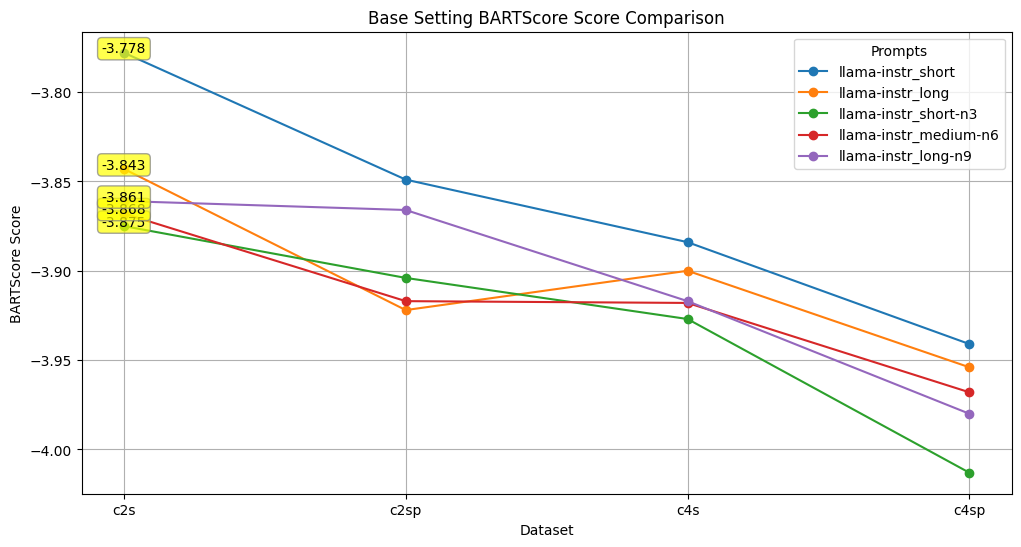

In [25]:
compare_prompt_setting(
    dataframe=df_filtered,
    score_type="BARTScore",
    dataset_column='dataset',
    column_type='bartscore',
    title="Base Setting BARTScore Score Comparison"
)

# Best setting for each model

## BART-ft

In [12]:
find_max_value(bart_ft_res,exclude_substrings=["subject"],exclude_datasets=["c2op","c2o"])

Highest score: 21.943
Dataset: c4sp
Column: target-sent-target-b1


In [4]:
find_max_value(bart_ft_res,exclude_substrings=["subject"],exclude_datasets=["c2op","c2o"],score_type="bsf1")

Highest score: 0.517
Dataset: c4sp
Column: target-sent-target-bsf1


In [5]:
find_max_value(bart_ft_res,exclude_substrings=["subject"],exclude_datasets=["c2op","c2o"],score_type="bartscore")

Highest score: -3.261
Dataset: c4sp
Column: target-phrase-bartscore


## Llama-ft

In [13]:
find_max_value(llama_ft_res,exclude_substrings=["subject"],exclude_datasets=["c2op","c2o"])

Highest score: 24.327
Dataset: c4s
Column: target-phrase-b1


In [6]:
find_max_value(llama_ft_res,exclude_substrings=["subject"],exclude_datasets=["c2op","c2o"],score_type="bsf1")

Highest score: 0.519
Dataset: c4s
Column: target-phrase-bsf1


In [7]:
find_max_value(llama_ft_res,exclude_substrings=["subject"],exclude_datasets=["c2op","c2o"],score_type="bartscore")

Highest score: -3.162
Dataset: c2sp
Column: target-phrase-bartscore


## Llama-instruct

In [14]:
find_max_value(llama_instr_res,exclude_substrings=["subject"],exclude_datasets=["c2op","c2o"])

Highest score: 19.185
Dataset: c2sp
Column: target-phrase-b1


In [8]:
find_max_value(llama_instr_res,exclude_substrings=["subject"],exclude_datasets=["c2op","c2o"],score_type="bsf1")

Highest score: 0.499
Dataset: c4sp
Column: target-phrase-bsf1


In [9]:
find_max_value(llama_instr_res,exclude_substrings=["subject"],exclude_datasets=["c2op","c2o"],score_type="bartscore")

Highest score: -3.453
Dataset: c4sp
Column: target-phrase-bartscore


### Prompt

In [16]:
find_max_value(llama_instr_prompt_res,exclude_substrings=["long-valid-b1"],exclude_datasets=["c2op","c2o"])

Highest score: 16.599
Dataset: c2s
Column: short-n3-b1


In [10]:
find_max_value(llama_instr_prompt_res,exclude_substrings=["long-valid-b1"],exclude_datasets=["c2op","c2o"],score_type="bsf1")

Highest score: 0.475
Dataset: c2s
Column: short-bsf1


In [11]:
find_max_value(llama_instr_prompt_res,exclude_substrings=["long-valid-b1"],exclude_datasets=["c2op","c2o"],score_type="bartscore")

Highest score: -3.778
Dataset: c2s
Column: short-bartscore


# Effectiveness of each setting

## Masked

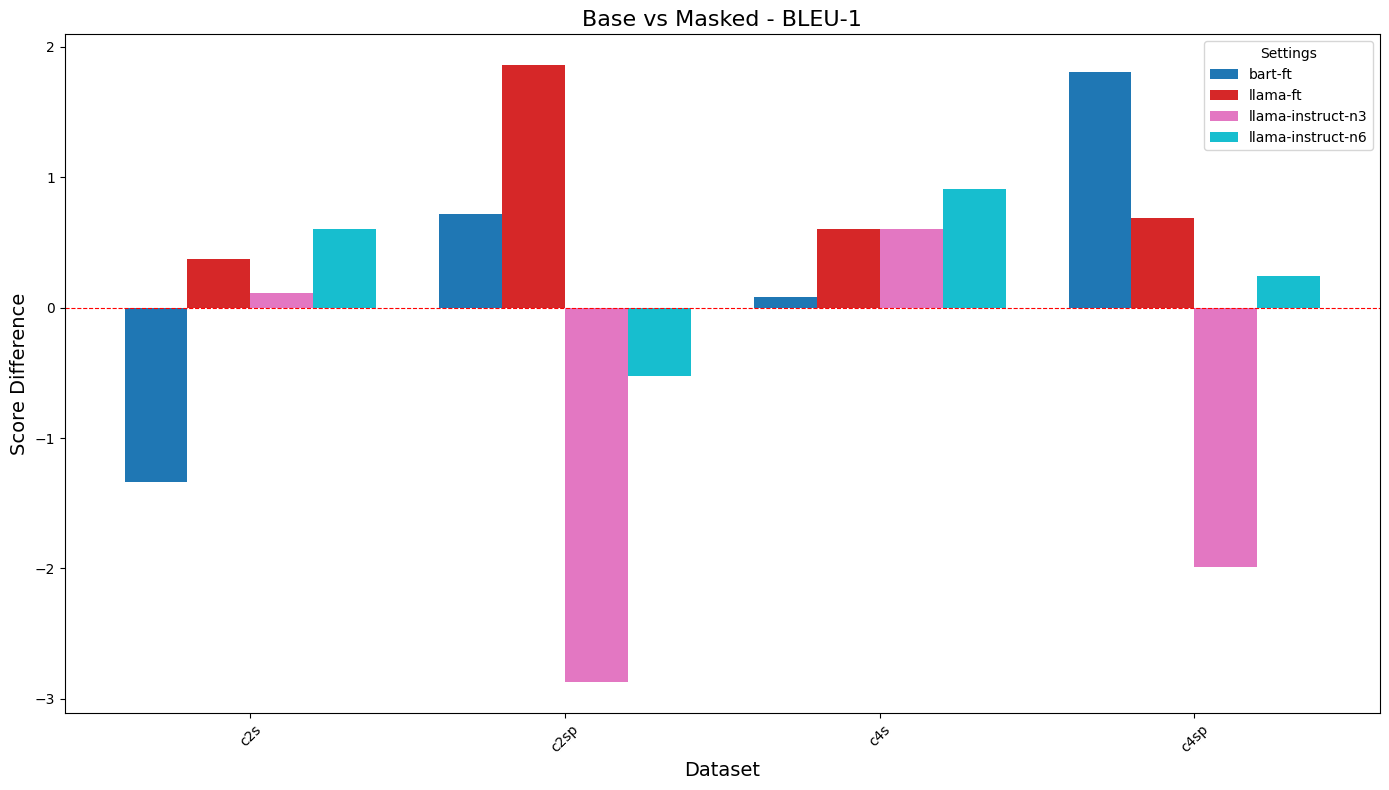

,dataset,bart-ft_base-b1,llama-ft_base-b1,llama-instr-few-shot_base-b1,llama-instr-few-shot_base-n3-b1,llama-instr-few-shot_base-n6-b1,bart-ft_masked-b1,llama-ft_masked-b1,llama-instr-few-shot_masked-n3-b1,llama-instr-few-shot_masked-n6-b1,Difference_bart-ft_masked-b1,Difference_llama-ft_masked-b1,Difference_llama-instr-few-shot_masked-n3-b1,Difference_llama-instr-few-shot_masked-n6-b1
0,c2s,20.127,22.070,15.899,16.599,16.284,18.792,22.447,16.395,16.886,-1.335,0.377,0.111,0.602
1,c2sp,19.784,20.439,15.266,15.888,16.451,20.500,22.299,13.579,15.926,0.716,1.860,-2.872,-0.525
2,c4s,19.593,23.374,15.712,14.788,15.158,19.678,23.978,15.758,16.068,0.085,0.604,0.600,0.910
3,c4sp,18.544,20.691,15.233,14.725,14.426,20.353,21.377,12.440,14.667,1.809,0.686,-1.986,0.241


In [86]:
from display_utils import *
bart_ft_df = preprocess_dataframe(bart_ft_res, "b1", "bart-ft")
llama_ft_df = preprocess_dataframe(llama_ft_res,"b1", "llama-ft")
llama_instr_df = preprocess_dataframe(llama_instr_res,"b1","llama-instr-few-shot")
df = merge_dataframes([bart_ft_df,llama_ft_df,llama_instr_df])

compare_to_base(
    df=df,
    settings_to_compare=['masked'],  
    score_type='b1',
    title="Base vs Masked - BLEU-1",
    exclude_columns=["llama-instr-few-shot_masked-b1"]
)

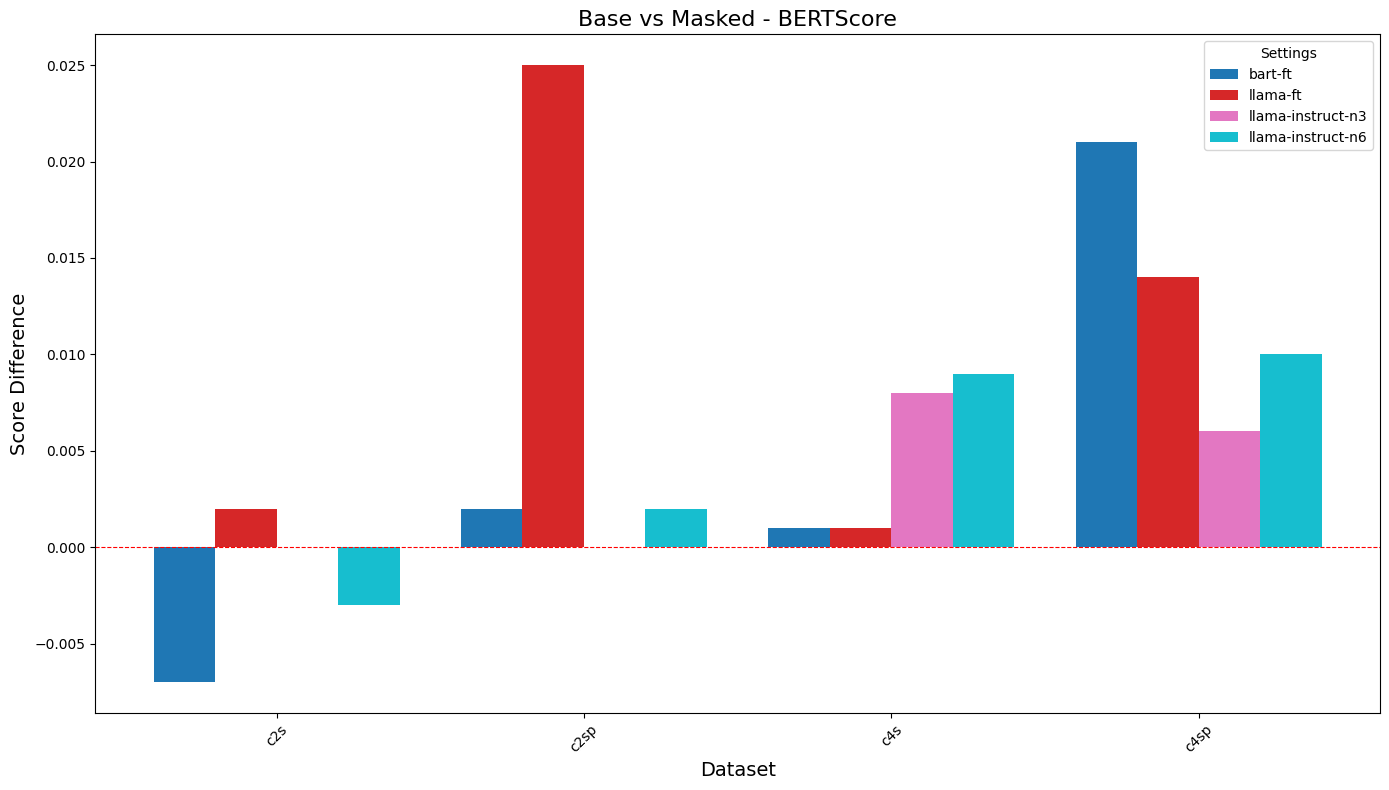

,dataset,bart-ft_base-bsf1,llama-ft_base-bsf1,llama-instr-few-shot_base-bsf1,llama-instr-few-shot_base-n3-bsf1,llama-instr-few-shot_base-n6-bsf1,bart-ft_masked-bsf1,llama-ft_masked-bsf1,llama-instr-few-shot_masked-n3-bsf1,llama-instr-few-shot_masked-n6-bsf1,Difference_bart-ft_masked-bsf1,Difference_llama-ft_masked-bsf1,Difference_llama-instr-few-shot_masked-n3-bsf1,Difference_llama-instr-few-shot_masked-n6-bsf1
0,c2s,0.468,0.501,0.475,0.453,0.450,0.461,0.503,0.450,0.447,-0.007,0.002,0.000,-0.003
1,c2sp,0.487,0.482,0.456,0.450,0.445,0.489,0.507,0.445,0.447,0.002,0.025,0.000,0.002
2,c4s,0.470,0.499,0.461,0.441,0.440,0.471,0.500,0.448,0.449,0.001,0.001,0.008,0.009
3,c4sp,0.470,0.479,0.447,0.436,0.432,0.491,0.493,0.438,0.442,0.021,0.014,0.006,0.010


In [87]:
from display_utils import *
bart_ft_df = preprocess_dataframe(bart_ft_res, "bsf1", "bart-ft")
llama_ft_df = preprocess_dataframe(llama_ft_res,"bsf1", "llama-ft")
llama_instr_df = preprocess_dataframe(llama_instr_res,"bsf1","llama-instr-few-shot")
df = merge_dataframes([bart_ft_df,llama_ft_df,llama_instr_df])
compare_to_base(
    df=df,
    settings_to_compare=['masked'],  
    score_type='bsf1',
    title="Base vs Masked - BERTScore",
    exclude_columns=["llama-instr-few-shot_masked-bsf1"]
)

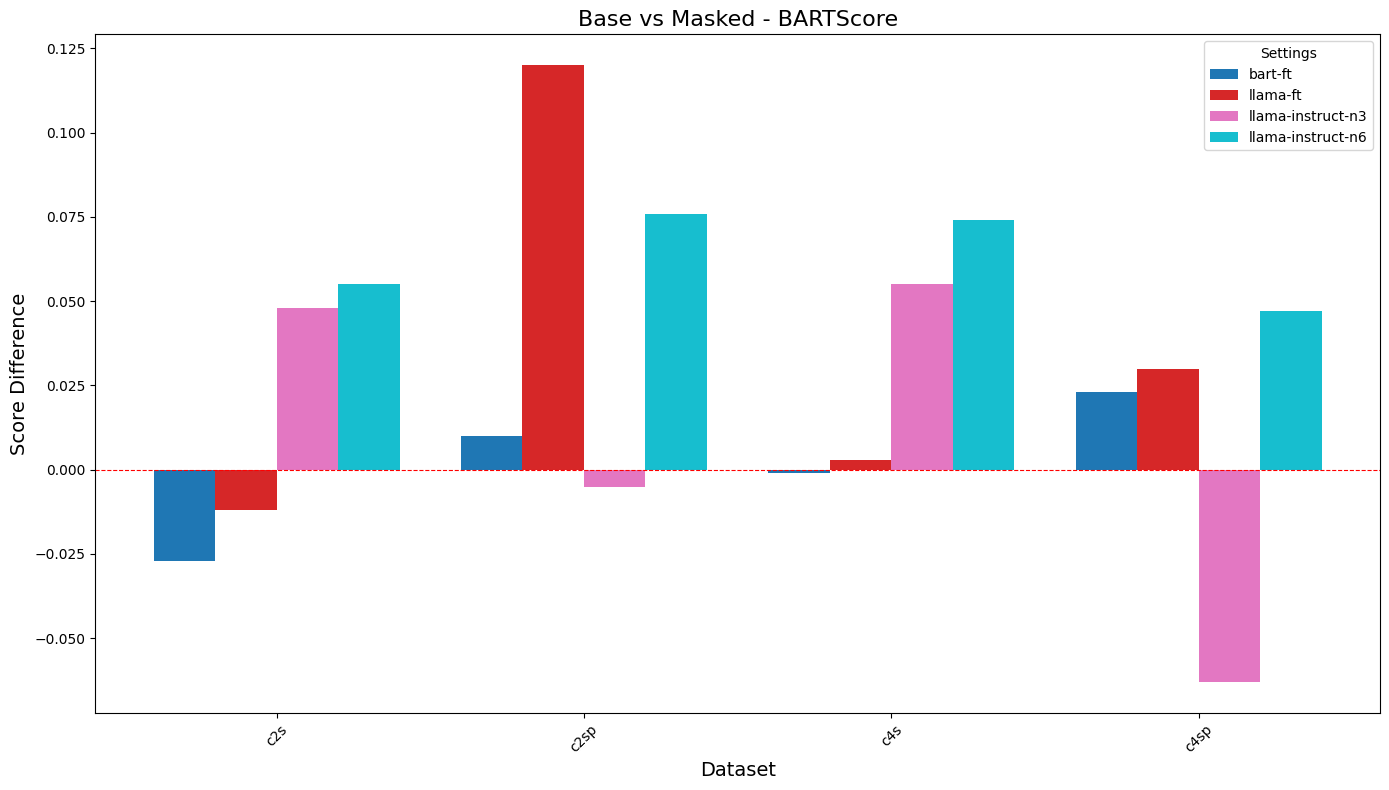

,dataset,bart-ft_base-bartscore,llama-ft_base-bartscore,llama-instr-few-shot_base-bartscore,llama-instr-few-shot_base-n3-bartscore,llama-instr-few-shot_base-n6-bartscore,bart-ft_masked-bartscore,llama-ft_masked-bartscore,llama-instr-few-shot_masked-n3-bartscore,llama-instr-few-shot_masked-n6-bartscore,Difference_bart-ft_masked-bartscore,Difference_llama-ft_masked-bartscore,Difference_llama-instr-few-shot_masked-n3-bartscore,Difference_llama-instr-few-shot_masked-n6-bartscore
0,c2s,-3.438,-3.328,-3.778,-3.875,-3.868,-3.465,-3.340,-3.820,-3.813,-0.027,-0.012,0.048,0.055
1,c2sp,-3.406,-3.393,-3.849,-3.904,-3.917,-3.396,-3.273,-3.922,-3.841,0.010,0.120,-0.005,0.076
2,c4s,-3.395,-3.344,-3.884,-3.927,-3.918,-3.396,-3.341,-3.863,-3.844,-0.001,0.003,0.055,0.074
3,c4sp,-3.386,-3.358,-3.941,-4.013,-3.968,-3.363,-3.328,-4.031,-3.921,0.023,0.030,-0.063,0.047


In [88]:
from display_utils import *
bart_ft_df = preprocess_dataframe(bart_ft_res, "bartscore", "bart-ft")
llama_ft_df = preprocess_dataframe(llama_ft_res,"bartscore", "llama-ft")
llama_instr_df = preprocess_dataframe(llama_instr_res,"bartscore","llama-instr-few-shot")
df = merge_dataframes([bart_ft_df,llama_ft_df,llama_instr_df])
compare_to_base(
    df=df,
    settings_to_compare=['masked'],  
    score_type='bartscore',
    title="Base vs Masked - BARTScore",
    exclude_columns=["llama-instr-few-shot_masked-bartscore"]
)

## Target phrase

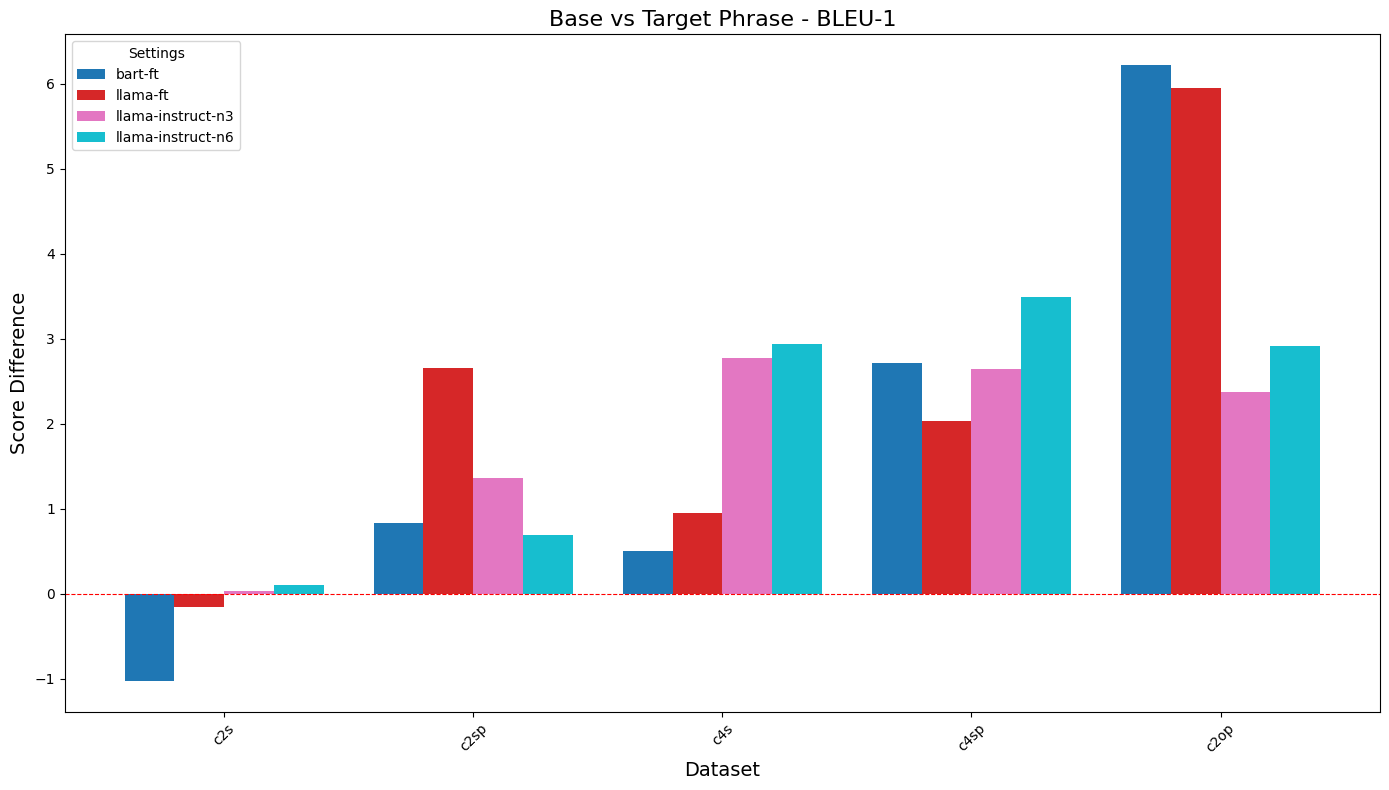

,dataset,bart-ft_base-b1,llama-ft_base-b1,llama-instr-few-shot_base-b1,llama-instr-few-shot_base-n3-b1,llama-instr-few-shot_base-n6-b1,bart-ft_target-phrase-b1,llama-ft_target-phrase-b1,llama-instr-few-shot_target-phrase-n3-b1,llama-instr-few-shot_target-phrase-n6-b1,Difference_bart-ft_target-phrase-b1,Difference_llama-ft_target-phrase-b1,Difference_llama-instr-few-shot_target-phrase-n3-b1,Difference_llama-instr-few-shot_target-phrase-n6-b1
0,c2s,20.127,22.070,15.899,16.599,16.284,19.096,21.908,16.313,16.389,-1.031,-0.162,0.029,0.105
1,c2sp,19.784,20.439,15.266,15.888,16.451,20.618,23.094,17.815,17.134,0.834,2.655,1.364,0.683
2,c4s,19.593,23.374,15.712,14.788,15.158,20.097,24.327,17.925,18.099,0.504,0.953,2.767,2.941
3,c4sp,18.544,20.691,15.233,14.725,14.426,21.256,22.723,17.070,17.914,2.712,2.032,2.644,3.488
6,c2op,18.676,16.604,13.401,12.324,13.407,24.893,22.555,15.777,16.320,6.217,5.951,2.370,2.913


In [103]:
from display_utils import *
bart_ft_df = preprocess_dataframe(bart_ft_res, "b1", "bart-ft")
llama_ft_df = preprocess_dataframe(llama_ft_res,"b1", "llama-ft")
llama_instr_df = preprocess_dataframe(llama_instr_res,"b1","llama-instr-few-shot")
df = merge_dataframes([bart_ft_df,llama_ft_df,llama_instr_df])

compare_to_base(
    df=df,
    settings_to_compare=['target-phrase'],  
    score_type='b1',
    title="Base vs Target Phrase - BLEU-1",
    exclude_columns=["llama-instr-few-shot_target-phrase-b1"]
)

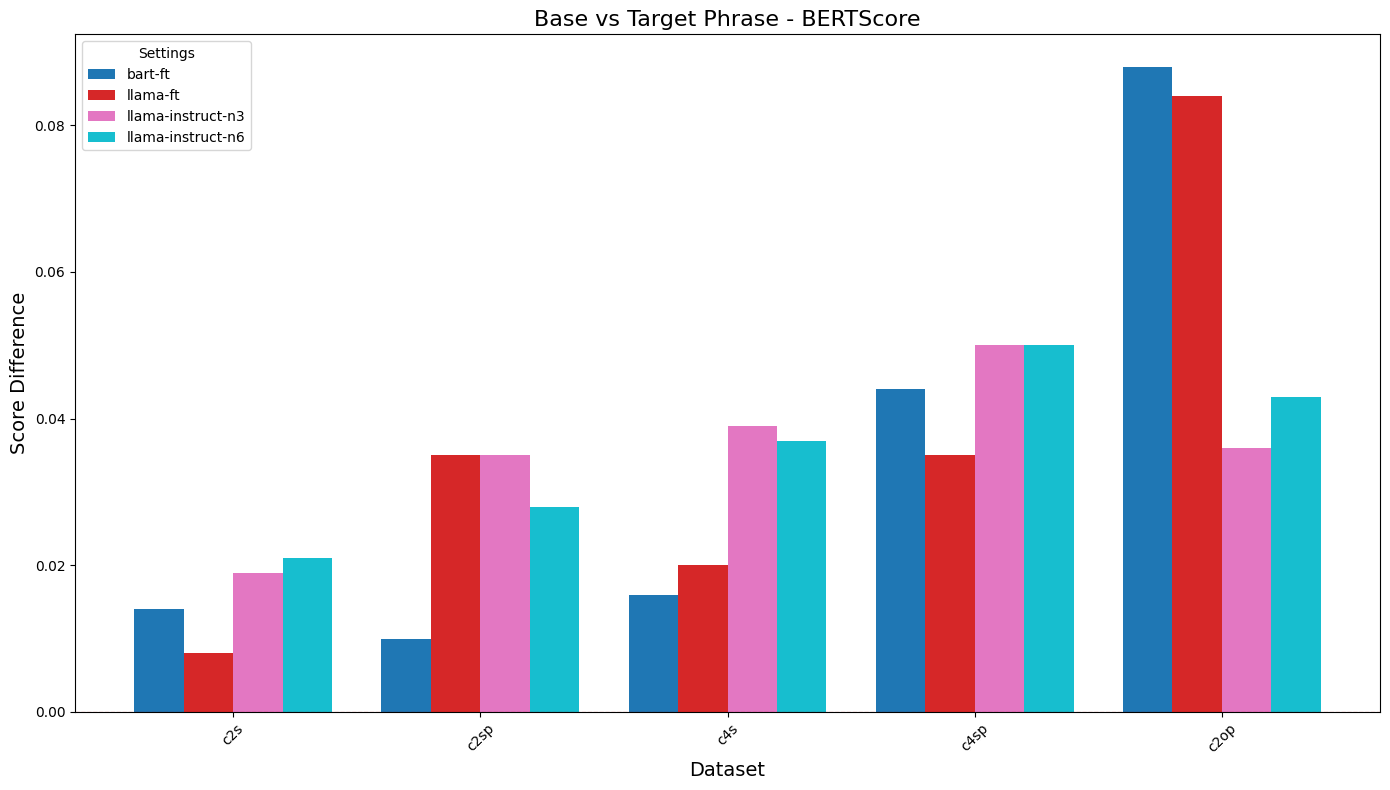

,dataset,bart-ft_base-bsf1,llama-ft_base-bsf1,llama-instr-few-shot_base-bsf1,llama-instr-few-shot_base-n3-bsf1,llama-instr-few-shot_base-n6-bsf1,bart-ft_target-phrase-bsf1,llama-ft_target-phrase-bsf1,llama-instr-few-shot_target-phrase-n3-bsf1,llama-instr-few-shot_target-phrase-n6-bsf1,Difference_bart-ft_target-phrase-bsf1,Difference_llama-ft_target-phrase-bsf1,Difference_llama-instr-few-shot_target-phrase-n3-bsf1,Difference_llama-instr-few-shot_target-phrase-n6-bsf1
0,c2s,0.468,0.501,0.475,0.453,0.450,0.482,0.509,0.469,0.471,0.014,0.008,0.019,0.021
1,c2sp,0.487,0.482,0.456,0.450,0.445,0.497,0.517,0.480,0.473,0.010,0.035,0.035,0.028
2,c4s,0.470,0.499,0.461,0.441,0.440,0.486,0.519,0.479,0.477,0.016,0.020,0.039,0.037
3,c4sp,0.470,0.479,0.447,0.436,0.432,0.514,0.514,0.482,0.482,0.044,0.035,0.050,0.050
6,c2op,0.449,0.435,0.433,0.424,0.428,0.537,0.519,0.464,0.471,0.088,0.084,0.036,0.043


In [92]:
from display_utils import *
bart_ft_df = preprocess_dataframe(bart_ft_res, "bsf1", "bart-ft")
llama_ft_df = preprocess_dataframe(llama_ft_res,"bsf1", "llama-ft")
llama_instr_df = preprocess_dataframe(llama_instr_res,"bsf1","llama-instr-few-shot")
df = merge_dataframes([bart_ft_df,llama_ft_df,llama_instr_df])

compare_to_base(
    df=df,
    settings_to_compare=['target-phrase'],  
    score_type='bsf1',
    title="Base vs Target Phrase - BERTScore",
    exclude_columns=["llama-instr-few-shot_target-phrase-bsf1"]
)

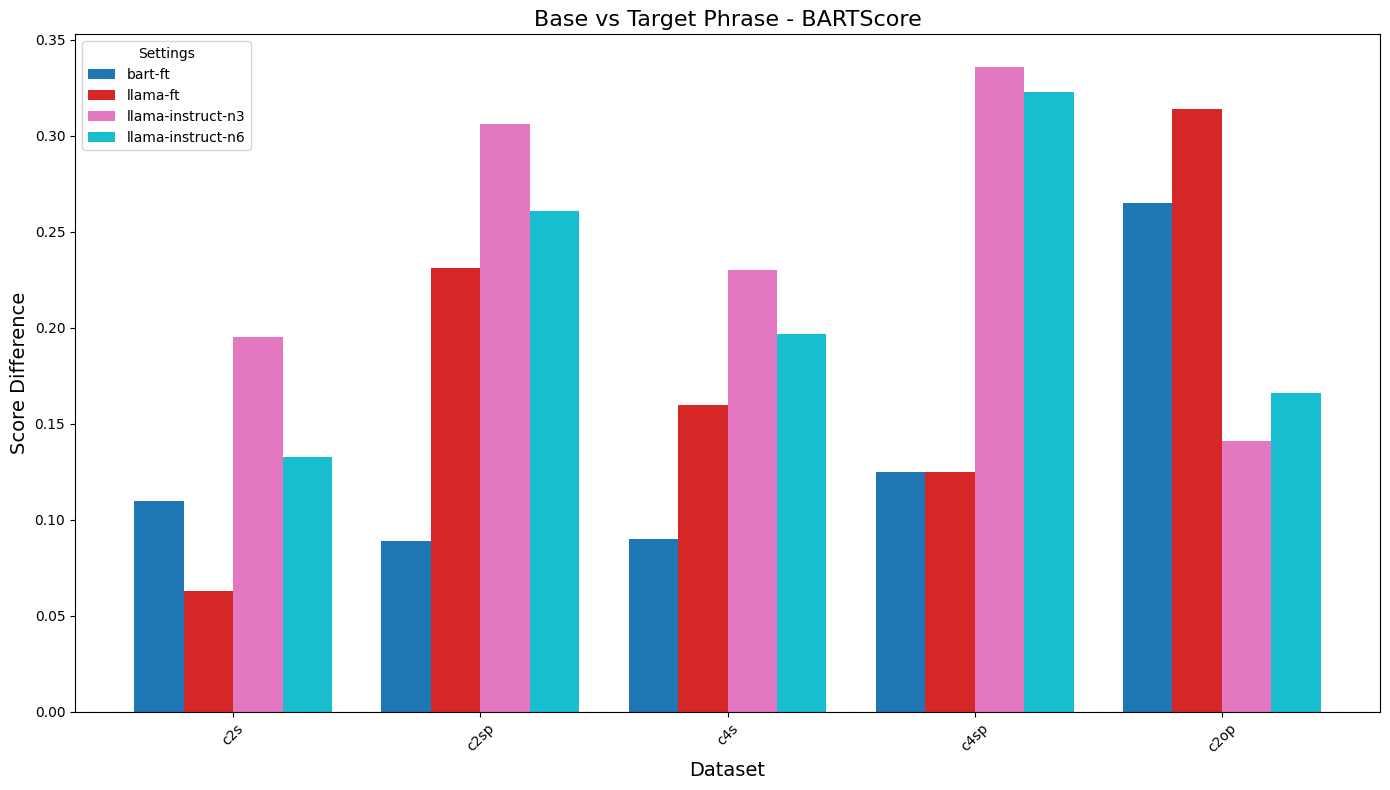

,dataset,bart-ft_base-bartscore,llama-ft_base-bartscore,llama-instr-few-shot_base-bartscore,llama-instr-few-shot_base-n3-bartscore,llama-instr-few-shot_base-n6-bartscore,bart-ft_target-phrase-bartscore,llama-ft_target-phrase-bartscore,llama-instr-few-shot_target-phrase-n3-bartscore,llama-instr-few-shot_target-phrase-n6-bartscore,Difference_bart-ft_target-phrase-bartscore,Difference_llama-ft_target-phrase-bartscore,Difference_llama-instr-few-shot_target-phrase-n3-bartscore,Difference_llama-instr-few-shot_target-phrase-n6-bartscore
0,c2s,-3.438,-3.328,-3.778,-3.875,-3.868,-3.328,-3.265,-3.673,-3.735,0.110,0.063,0.195,0.133
1,c2sp,-3.406,-3.393,-3.849,-3.904,-3.917,-3.317,-3.162,-3.611,-3.656,0.089,0.231,0.306,0.261
2,c4s,-3.395,-3.344,-3.884,-3.927,-3.918,-3.305,-3.184,-3.688,-3.721,0.090,0.160,0.230,0.197
3,c4sp,-3.386,-3.358,-3.941,-4.013,-3.968,-3.261,-3.233,-3.632,-3.645,0.125,0.125,0.336,0.323
6,c2op,-3.543,-3.579,-4.097,-4.162,-4.058,-3.278,-3.265,-3.917,-3.892,0.265,0.314,0.141,0.166


In [94]:
from display_utils import *
bart_ft_df = preprocess_dataframe(bart_ft_res, "bartscore", "bart-ft")
llama_ft_df = preprocess_dataframe(llama_ft_res,"bartscore", "llama-ft")
llama_instr_df = preprocess_dataframe(llama_instr_res,"bartscore","llama-instr-few-shot")
df = merge_dataframes([bart_ft_df,llama_ft_df,llama_instr_df])

compare_to_base(
    df=df,
    settings_to_compare=['target-phrase'],  
    score_type='bartscore',
    title="Base vs Target Phrase - BARTScore",
    exclude_columns=["llama-instr-few-shot_target-phrase-bartscore"]
)

## Target Sentence

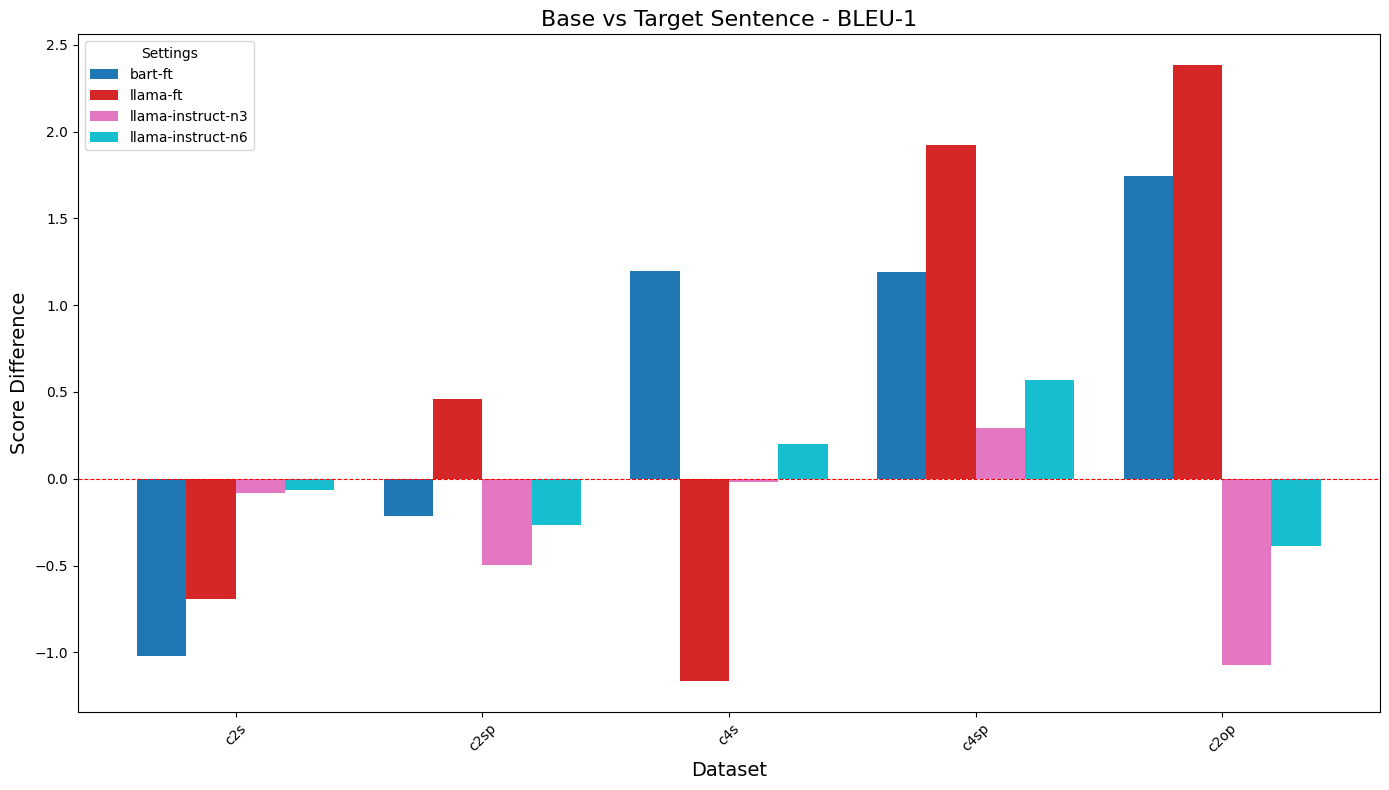

,dataset,bart-ft_base-b1,llama-ft_base-b1,llama-instr-few-shot_base-b1,llama-instr-few-shot_base-n3-b1,llama-instr-few-shot_base-n6-b1,bart-ft_target-sent-b1,llama-ft_target-sent-b1,llama-instr-few-shot_target-sent-n3-b1,llama-instr-few-shot_target-sent-n6-b1,Difference_bart-ft_target-sent-b1,Difference_llama-ft_target-sent-b1,Difference_llama-instr-few-shot_target-sent-n3-b1,Difference_llama-instr-few-shot_target-sent-n6-b1
0,c2s,20.127,22.070,15.899,16.599,16.284,19.105,21.379,16.201,16.218,-1.022,-0.691,-0.083,-0.066
1,c2sp,19.784,20.439,15.266,15.888,16.451,19.568,20.896,15.954,16.185,-0.216,0.457,-0.497,-0.266
2,c4s,19.593,23.374,15.712,14.788,15.158,20.790,22.208,15.141,15.358,1.197,-1.166,-0.017,0.200
3,c4sp,18.544,20.691,15.233,14.725,14.426,19.733,22.612,14.721,14.997,1.189,1.921,0.295,0.571
6,c2op,18.676,16.604,13.401,12.324,13.407,20.421,18.987,12.336,13.021,1.745,2.383,-1.071,-0.386


In [104]:
from display_utils import *
bart_ft_df = preprocess_dataframe(bart_ft_res, "b1", "bart-ft")
llama_ft_df = preprocess_dataframe(llama_ft_res,"b1", "llama-ft")
llama_instr_df = preprocess_dataframe(llama_instr_res,"b1","llama-instr-few-shot")
df = merge_dataframes([bart_ft_df,llama_ft_df,llama_instr_df])

compare_to_base(
    df=df,
    settings_to_compare=['target-sent'],  
    score_type='b1',
    title="Base vs Target Sentence - BLEU-1",
    exclude_columns=["llama-instr-few-shot_target-sent-b1"]
)

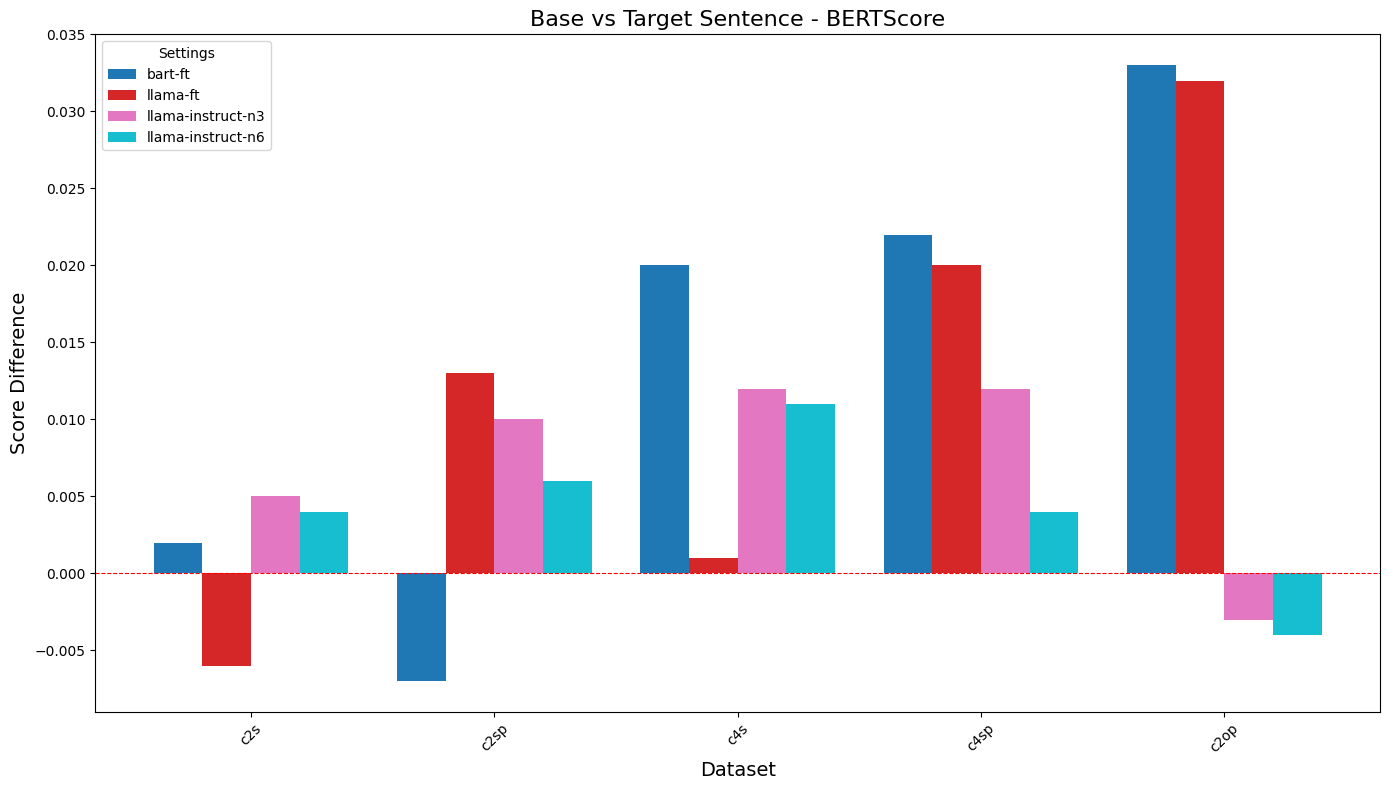

,dataset,bart-ft_base-bsf1,llama-ft_base-bsf1,llama-instr-few-shot_base-bsf1,llama-instr-few-shot_base-n3-bsf1,llama-instr-few-shot_base-n6-bsf1,bart-ft_target-sent-bsf1,llama-ft_target-sent-bsf1,llama-instr-few-shot_target-sent-n3-bsf1,llama-instr-few-shot_target-sent-n6-bsf1,Difference_bart-ft_target-sent-bsf1,Difference_llama-ft_target-sent-bsf1,Difference_llama-instr-few-shot_target-sent-n3-bsf1,Difference_llama-instr-few-shot_target-sent-n6-bsf1
0,c2s,0.468,0.501,0.475,0.453,0.450,0.470,0.495,0.455,0.454,0.002,-0.006,0.005,0.004
1,c2sp,0.487,0.482,0.456,0.450,0.445,0.480,0.495,0.455,0.451,-0.007,0.013,0.010,0.006
2,c4s,0.470,0.499,0.461,0.441,0.440,0.490,0.500,0.452,0.451,0.020,0.001,0.012,0.011
3,c4sp,0.470,0.479,0.447,0.436,0.432,0.492,0.499,0.444,0.436,0.022,0.020,0.012,0.004
6,c2op,0.449,0.435,0.433,0.424,0.428,0.482,0.467,0.425,0.424,0.033,0.032,-0.003,-0.004


In [105]:
from display_utils import *
bart_ft_df = preprocess_dataframe(bart_ft_res, "bsf1", "bart-ft")
llama_ft_df = preprocess_dataframe(llama_ft_res,"bsf1", "llama-ft")
llama_instr_df = preprocess_dataframe(llama_instr_res,"bsf1","llama-instr-few-shot")
df = merge_dataframes([bart_ft_df,llama_ft_df,llama_instr_df])

compare_to_base(
    df=df,
    settings_to_compare=['target-sent'],  
    score_type='bsf1',
    title="Base vs Target Sentence - BERTScore",
    exclude_columns=["llama-instr-few-shot_target-sent-bsf1"]
)

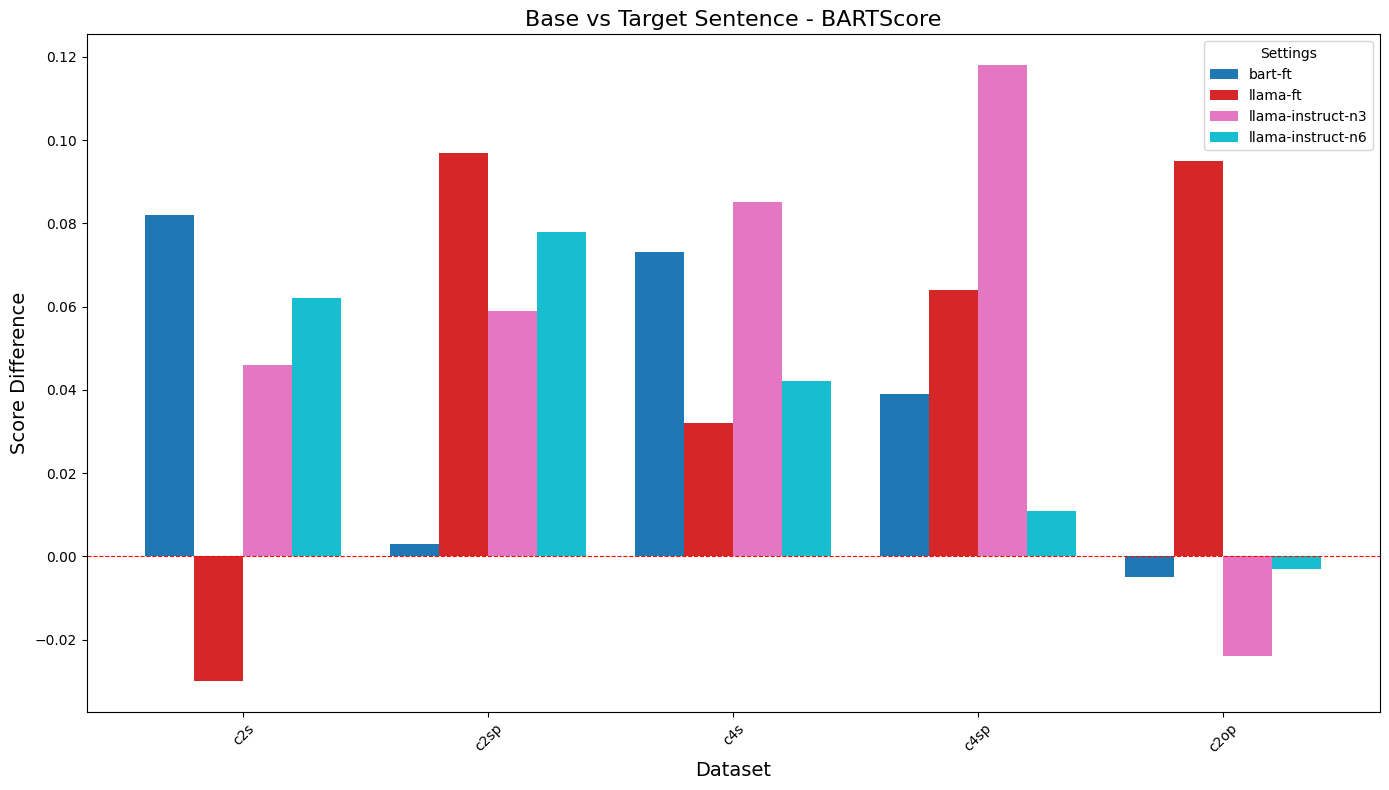

,dataset,bart-ft_base-bartscore,llama-ft_base-bartscore,llama-instr-few-shot_base-bartscore,llama-instr-few-shot_base-n3-bartscore,llama-instr-few-shot_base-n6-bartscore,bart-ft_target-sent-bartscore,llama-ft_target-sent-bartscore,llama-instr-few-shot_target-sent-n3-bartscore,llama-instr-few-shot_target-sent-n6-bartscore,Difference_bart-ft_target-sent-bartscore,Difference_llama-ft_target-sent-bartscore,Difference_llama-instr-few-shot_target-sent-n3-bartscore,Difference_llama-instr-few-shot_target-sent-n6-bartscore
0,c2s,-3.438,-3.328,-3.778,-3.875,-3.868,-3.356,-3.358,-3.822,-3.806,0.082,-0.030,0.046,0.062
1,c2sp,-3.406,-3.393,-3.849,-3.904,-3.917,-3.403,-3.296,-3.858,-3.839,0.003,0.097,0.059,0.078
2,c4s,-3.395,-3.344,-3.884,-3.927,-3.918,-3.322,-3.312,-3.833,-3.876,0.073,0.032,0.085,0.042
3,c4sp,-3.386,-3.358,-3.941,-4.013,-3.968,-3.347,-3.294,-3.850,-3.957,0.039,0.064,0.118,0.011
6,c2op,-3.543,-3.579,-4.097,-4.162,-4.058,-3.548,-3.484,-4.082,-4.061,-0.005,0.095,-0.024,-0.003


In [107]:
from display_utils import *
bart_ft_df = preprocess_dataframe(bart_ft_res, "bartscore", "bart-ft")
llama_ft_df = preprocess_dataframe(llama_ft_res,"bartscore", "llama-ft")
llama_instr_df = preprocess_dataframe(llama_instr_res,"bartscore","llama-instr-few-shot")
df = merge_dataframes([bart_ft_df,llama_ft_df,llama_instr_df])

compare_to_base(
    df=df,
    settings_to_compare=['target-sent'],  
    score_type='bartscore',
    title="Base vs Target Sentence - BARTScore",
    exclude_columns=["llama-instr-few-shot_target-sent-bartscore"]
)

## Target Sentence + Target Phrase

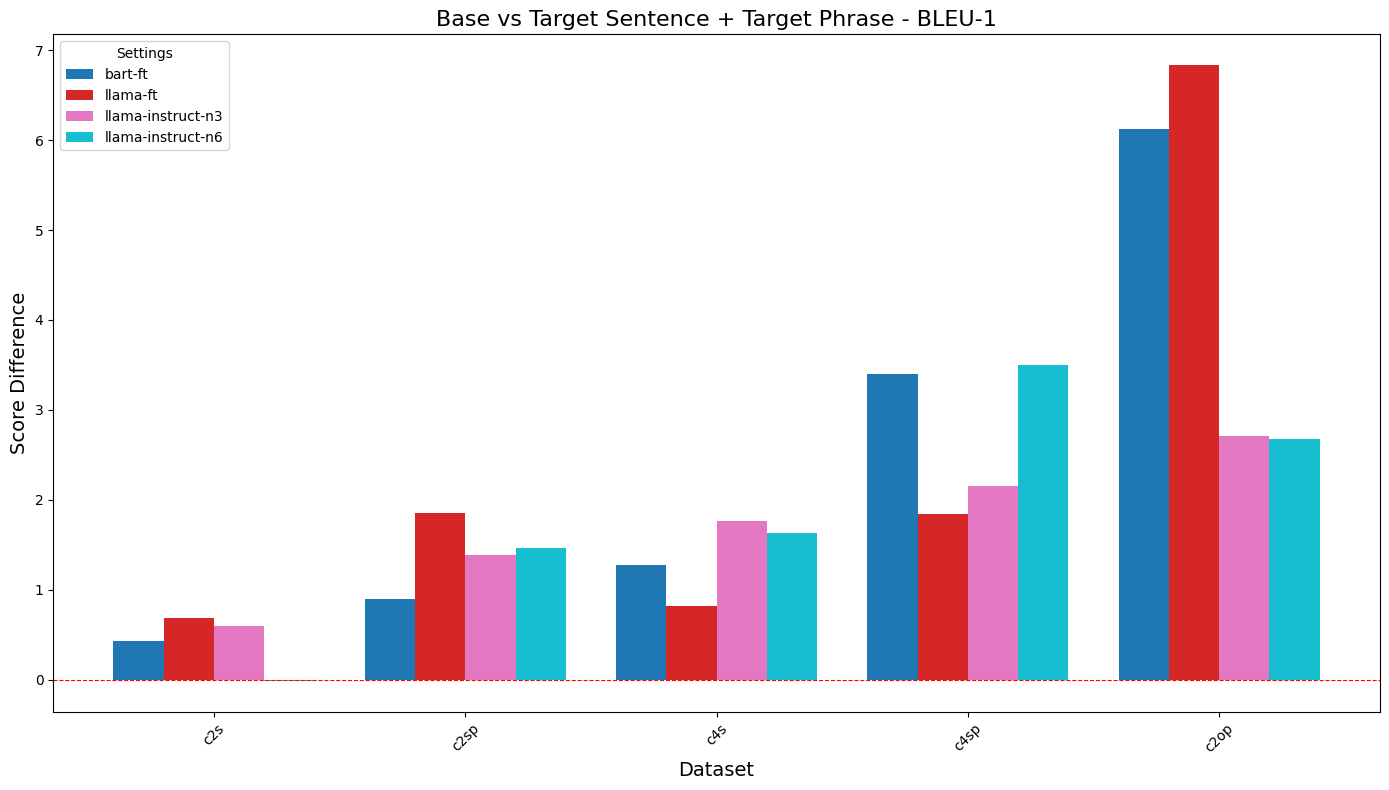

,dataset,bart-ft_base-b1,llama-ft_base-b1,llama-instr-few-shot_base-b1,llama-instr-few-shot_base-n3-b1,llama-instr-few-shot_base-n6-b1,bart-ft_target-sent-target-b1,llama-ft_target-sent-target-b1,llama-instr-few-shot_target-sent-target-n3-b1,llama-instr-few-shot_target-sent-target-n6-b1,Difference_bart-ft_target-sent-target-b1,Difference_llama-ft_target-sent-target-b1,Difference_llama-instr-few-shot_target-sent-target-n3-b1,Difference_llama-instr-few-shot_target-sent-target-n6-b1
0,c2s,20.127,22.070,15.899,16.599,16.284,20.562,22.760,16.878,16.267,0.435,0.690,0.594,-0.017
1,c2sp,19.784,20.439,15.266,15.888,16.451,20.683,22.291,17.834,17.913,0.899,1.852,1.383,1.462
2,c4s,19.593,23.374,15.712,14.788,15.158,20.867,24.196,16.922,16.788,1.274,0.822,1.764,1.630
3,c4sp,18.544,20.691,15.233,14.725,14.426,21.943,22.533,16.577,17.927,3.399,1.842,2.151,3.501
6,c2op,18.676,16.604,13.401,12.324,13.407,24.802,23.438,16.111,16.082,6.126,6.834,2.704,2.675


In [96]:
from display_utils import *
bart_ft_df = preprocess_dataframe(bart_ft_res, "b1", "bart-ft")
llama_ft_df = preprocess_dataframe(llama_ft_res,"b1", "llama-ft")
llama_instr_df = preprocess_dataframe(llama_instr_res,"b1","llama-instr-few-shot")
df = merge_dataframes([bart_ft_df,llama_ft_df,llama_instr_df])

compare_to_base(
    df=df,
    settings_to_compare=['target-sent-target'],  
    score_type='b1',
    title="Base vs Target Sentence + Target Phrase - BLEU-1",
    exclude_columns=["llama-instr-few-shot_target-sent-target-b1"]
)

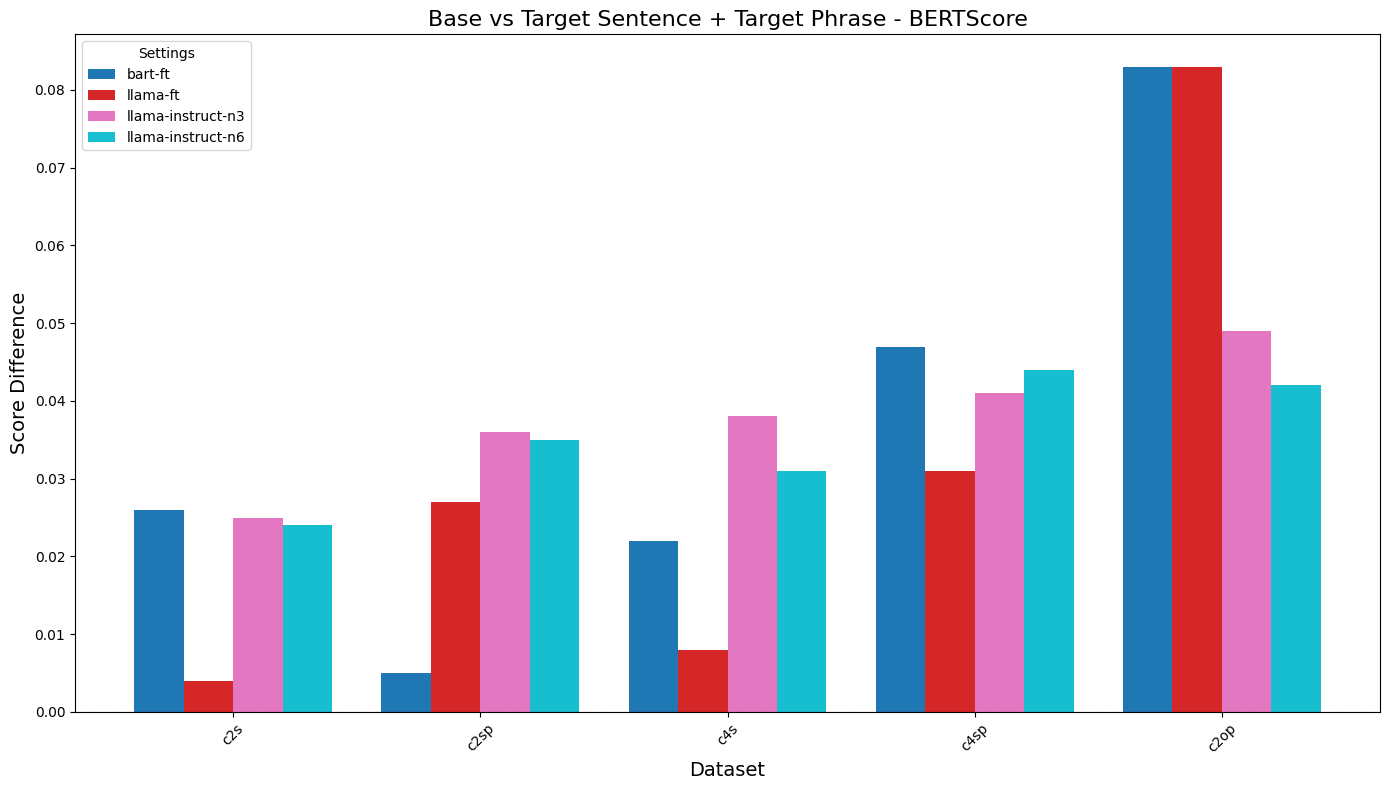

,dataset,bart-ft_base-bsf1,llama-ft_base-bsf1,llama-instr-few-shot_base-bsf1,llama-instr-few-shot_base-n3-bsf1,llama-instr-few-shot_base-n6-bsf1,bart-ft_target-sent-target-bsf1,llama-ft_target-sent-target-bsf1,llama-instr-few-shot_target-sent-target-n3-bsf1,llama-instr-few-shot_target-sent-target-n6-bsf1,Difference_bart-ft_target-sent-target-bsf1,Difference_llama-ft_target-sent-target-bsf1,Difference_llama-instr-few-shot_target-sent-target-n3-bsf1,Difference_llama-instr-few-shot_target-sent-target-n6-bsf1
0,c2s,0.468,0.501,0.475,0.453,0.450,0.494,0.505,0.475,0.474,0.026,0.004,0.025,0.024
1,c2sp,0.487,0.482,0.456,0.450,0.445,0.492,0.509,0.481,0.480,0.005,0.027,0.036,0.035
2,c4s,0.470,0.499,0.461,0.441,0.440,0.492,0.507,0.478,0.471,0.022,0.008,0.038,0.031
3,c4sp,0.470,0.479,0.447,0.436,0.432,0.517,0.510,0.473,0.476,0.047,0.031,0.041,0.044
6,c2op,0.449,0.435,0.433,0.424,0.428,0.532,0.518,0.477,0.470,0.083,0.083,0.049,0.042


In [97]:
from display_utils import *
bart_ft_df = preprocess_dataframe(bart_ft_res, "bsf1", "bart-ft")
llama_ft_df = preprocess_dataframe(llama_ft_res,"bsf1", "llama-ft")
llama_instr_df = preprocess_dataframe(llama_instr_res,"bsf1","llama-instr-few-shot")
df = merge_dataframes([bart_ft_df,llama_ft_df,llama_instr_df])

compare_to_base(
    df=df,
    settings_to_compare=['target-sent-target'],  
    score_type='bsf1',
    title="Base vs Target Sentence + Target Phrase - BERTScore",
    exclude_columns=["llama-instr-few-shot_target-sent-target-bsf1"]
)

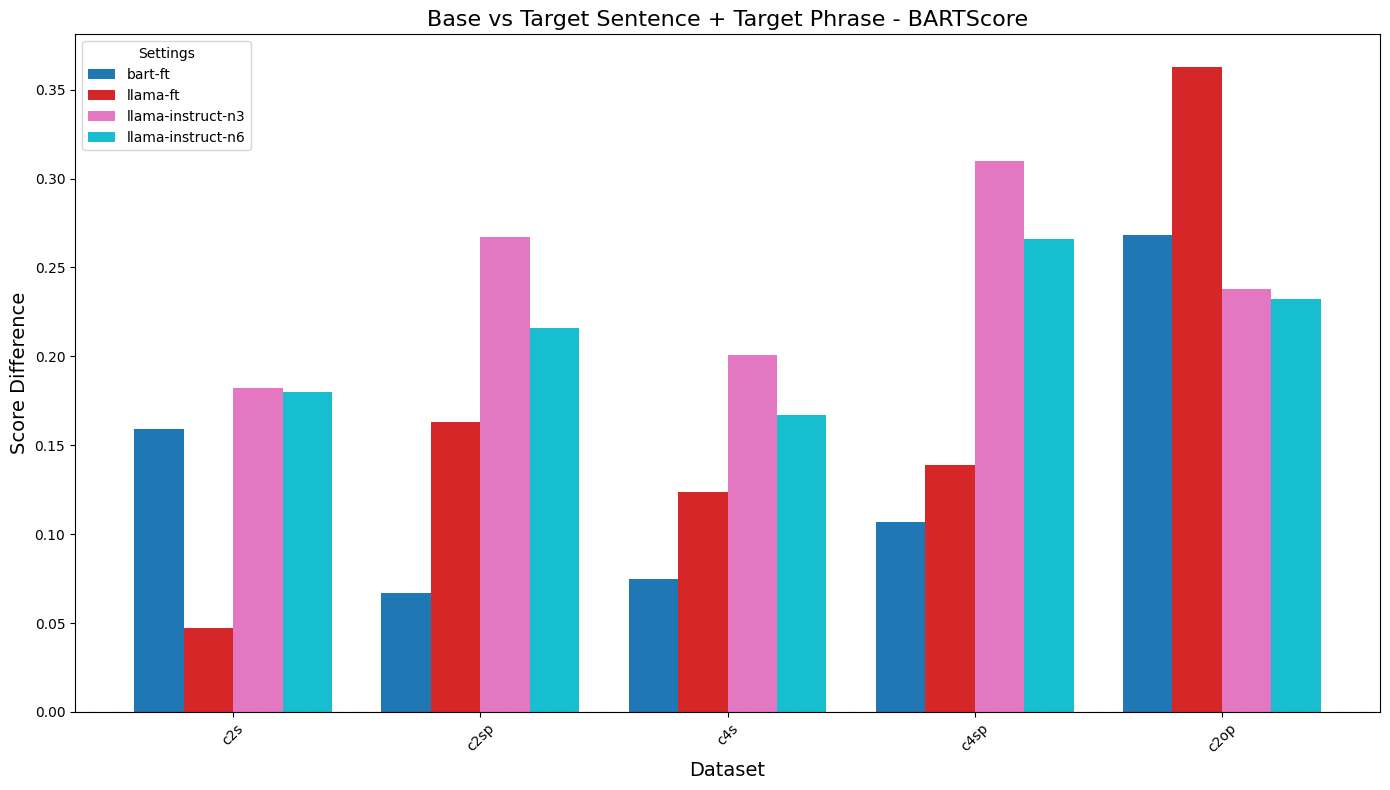

,dataset,bart-ft_base-bartscore,llama-ft_base-bartscore,llama-instr-few-shot_base-bartscore,llama-instr-few-shot_base-n3-bartscore,llama-instr-few-shot_base-n6-bartscore,bart-ft_target-sent-target-bartscore,llama-ft_target-sent-target-bartscore,llama-instr-few-shot_target-sent-target-n3-bartscore,llama-instr-few-shot_target-sent-target-n6-bartscore,Difference_bart-ft_target-sent-target-bartscore,Difference_llama-ft_target-sent-target-bartscore,Difference_llama-instr-few-shot_target-sent-target-n3-bartscore,Difference_llama-instr-few-shot_target-sent-target-n6-bartscore
0,c2s,-3.438,-3.328,-3.778,-3.875,-3.868,-3.279,-3.281,-3.686,-3.688,0.159,0.047,0.182,0.180
1,c2sp,-3.406,-3.393,-3.849,-3.904,-3.917,-3.339,-3.230,-3.650,-3.701,0.067,0.163,0.267,0.216
2,c4s,-3.395,-3.344,-3.884,-3.927,-3.918,-3.320,-3.220,-3.717,-3.751,0.075,0.124,0.201,0.167
3,c4sp,-3.386,-3.358,-3.941,-4.013,-3.968,-3.279,-3.219,-3.658,-3.702,0.107,0.139,0.310,0.266
6,c2op,-3.543,-3.579,-4.097,-4.162,-4.058,-3.275,-3.216,-3.820,-3.826,0.268,0.363,0.238,0.232


In [100]:
from display_utils import *
bart_ft_df = preprocess_dataframe(bart_ft_res, "bartscore", "bart-ft")
llama_ft_df = preprocess_dataframe(llama_ft_res,"bartscore", "llama-ft")
llama_instr_df = preprocess_dataframe(llama_instr_res,"bartscore","llama-instr-few-shot")
df = merge_dataframes([bart_ft_df,llama_ft_df,llama_instr_df])

compare_to_base(
    df=df,
    settings_to_compare=['target-sent-target'],  
    score_type='bartscore',
    title="Base vs Target Sentence + Target Phrase - BARTScore",
    exclude_columns=["llama-instr-few-shot_target-sent-target-bartscore"]
)